In [160]:
#Recuerda cargar el archivo predictPy en notebook
import warnings
import pandas as pd
import numpy  as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from predictPy import Analisis_Predictivo
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [161]:
class MetricsCalculator:
    def __init__(self, confusion_matrix):
        self.confusion_matrix = confusion_matrix

    def calculate_metrics(self):
        tn, fp, fn, tp = self.confusion_matrix

        precision_global = (tp + tn) / sum(self.confusion_matrix)
        error_global = 1 - precision_global

        precision_positiva = tp / (fn + tp)
        precision_negativa = tn / (tn + fp)

        metrics_dict = {
            "Precisión Global": precision_global,
            "Error Global": error_global,
            "Precisión Positiva": precision_positiva,
            "Precisión Negativa": precision_negativa
        }

        return metrics_dict

En este ejercicio se usara la tabla de datos breast cancer.csv. La tabla contiene 569 filas y 9 columnas

In [162]:
#lectura de datos
datos = pd.read_csv('C:/Users/uriar/OneDrive/Fátima Uriarte/Fati Files/PROMIDAD Generacion ETA/Python/3. Metodos Supervisados Python/Clase 4/Tarea4/breast_cancer.csv',delimiter = ',',decimal = ".")
print("Hotel breast cancer: ", datos.shape, "\n")

Hotel breast cancer:  (569, 9) 



In [163]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   concavity_mean          569 non-null    float64
 6   concave.points_mean     569 non-null    float64
 7   symmetry_mean           569 non-null    float64
 8   fractal_dimension_mean  569 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.1+ KB


In [164]:
datos.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


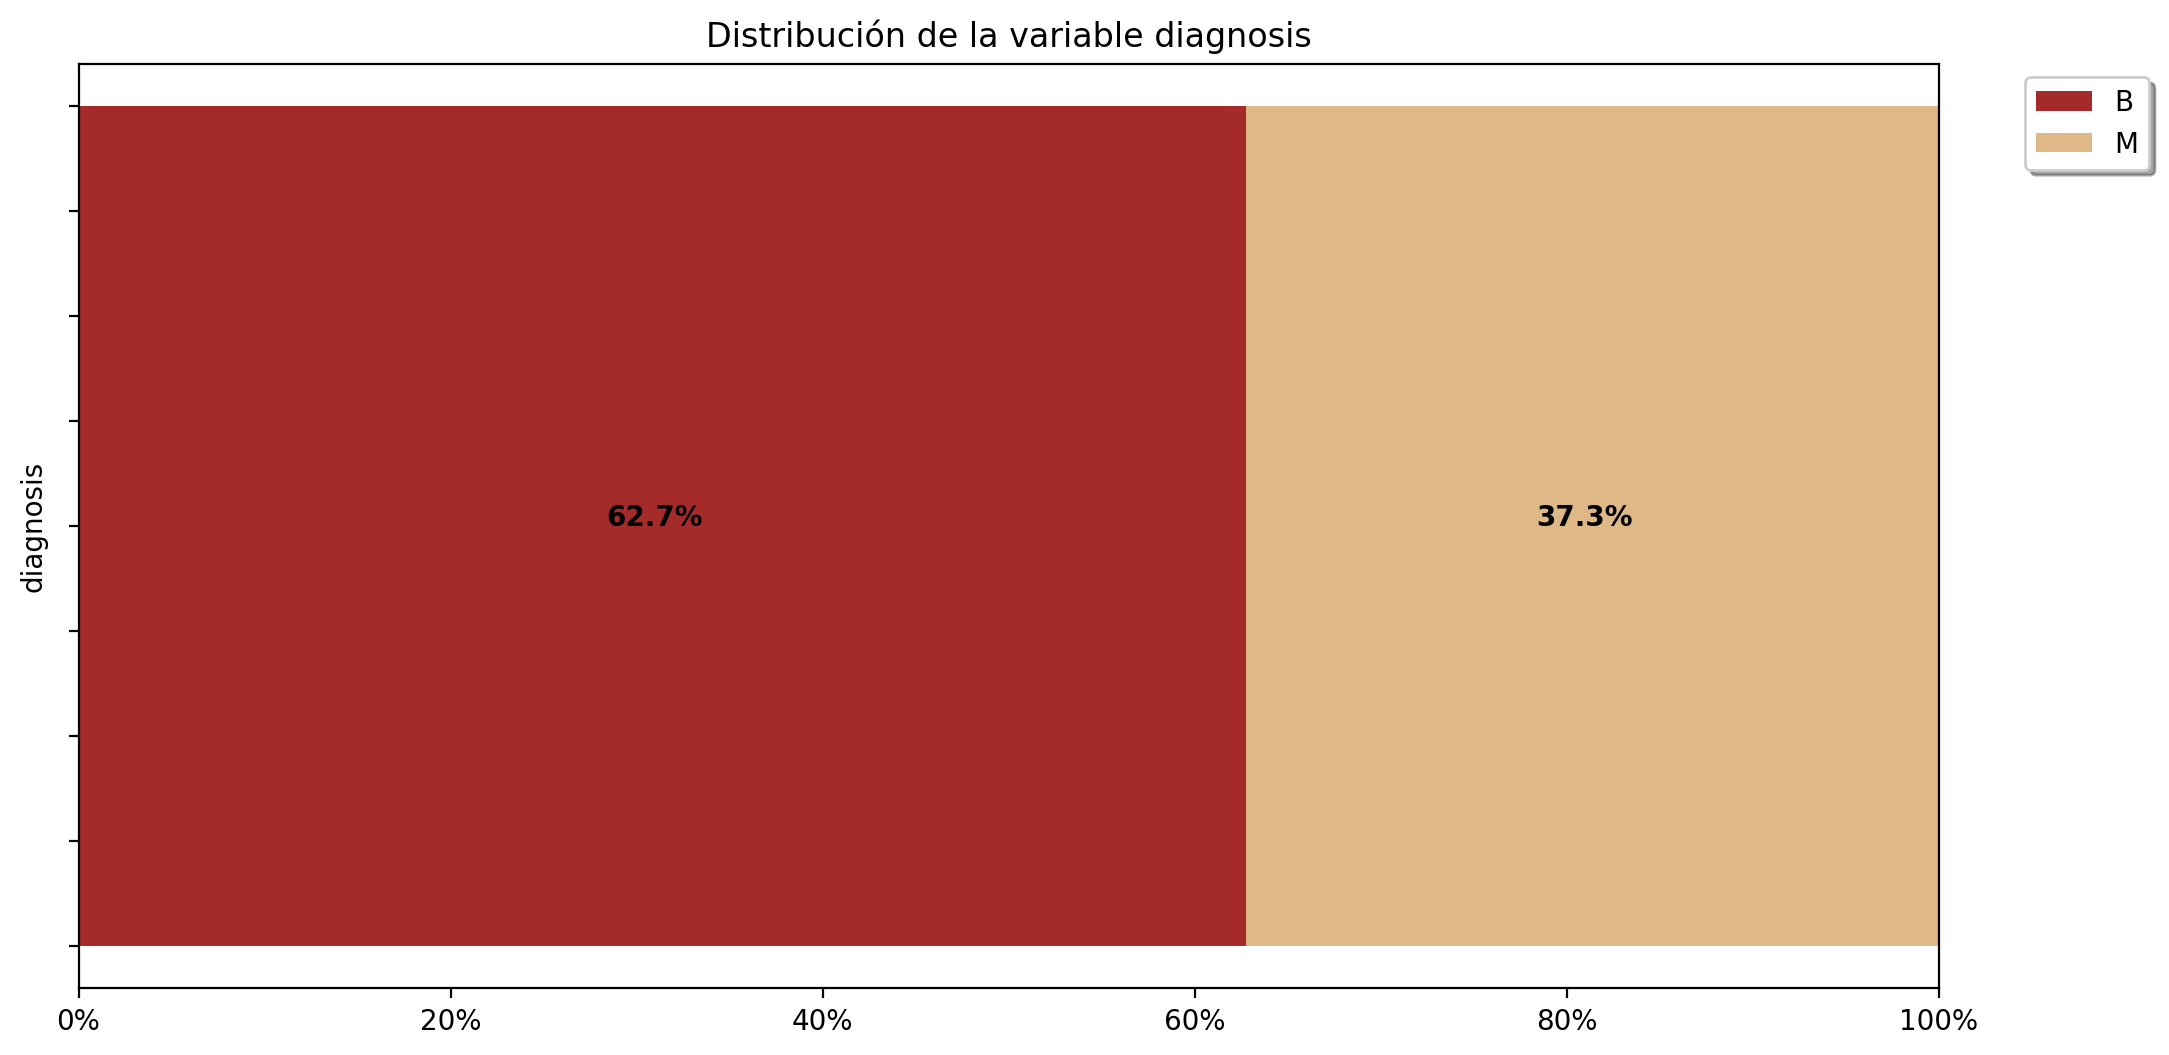

In [165]:
#Balance de las clases en la variable a predecir - Problema desbalanceado
analisis_Credito = Analisis_Predictivo(datos, predecir="diagnosis")
analisis_Credito.distribucion_variable_predecir()
plt.show()

a) Utilice Máquinas de Soporte Vectorial en Python para generar un modelo predictivo para la tabla breast_cancer.csv, utilizando el 80% de los datos para el conjunto de entrenamiento y el 20% para el conjunto de prueba. Obtenga los índices de precisión e interprete los resultados.

In [166]:
# Tenemos disponibles los núcleos linear, poly, rbf, sigmoid, precomputed. Por defecto se utiliza rbf
instancia_svm = SVC(kernel="rbf")

analisis_cancer = Analisis_Predictivo(datos, predecir = "diagnosis", modelo = instancia_svm, train_size = 0.8)

In [167]:
resultados = analisis_cancer.fit_predict_resultados()


Matriz de Confusión:
[[68  1]
 [ 2 43]]

Precisión Global:
0.9736842105263158

Error Global:
0.02631578947368418

Precisión por categoría:
          B         M
0  0.985507  0.955556


El indice de precision global y la precision por categoria es 98%, lo cual indica que el modelo es bastante bueno. 

b) Repita el ítem anterior pero intente identificar el mejor núcleo (Kernel) y valor para el parámetro de regularización C. ¿Mejora la predicción?

In [168]:
import pandas as pd
from sklearn.svm import SVC

nucleos = ["linear", "poly", "rbf", "sigmoid"]
resultados_modelos = {}

for nucleo in nucleos:
    nombre_analisis = f"analisis_{nucleo}"  # Nombre del análisis usando el nombre del núcleo
    instancia_svm = SVC(kernel=nucleo)
    # Definir analisis_cancer con un nombre diferente según el núcleo utilizado
    exec(f"{nombre_analisis} = Analisis_Predictivo(datos, predecir='diagnosis', modelo=instancia_svm, train_size=0.8)")
    print("\033[1m" + nombre_analisis + "\033[0m")  # Imprimir en negrita
    resultados = eval(nombre_analisis).fit_predict_resultados()
    resultados_modelos[nucleo] = resultados


analisis_linear

Matriz de Confusión:
[[70  6]
 [ 2 36]]

Precisión Global:
0.9298245614035088

Error Global:
0.07017543859649122

Precisión por categoría:
          B         M
0  0.921053  0.947368
analisis_poly

Matriz de Confusión:
[[68  1]
 [12 33]]

Precisión Global:
0.8859649122807017

Error Global:
0.11403508771929827

Precisión por categoría:
          B         M
0  0.985507  0.733333
analisis_rbf

Matriz de Confusión:
[[65  1]
 [ 8 40]]

Precisión Global:
0.9210526315789473

Error Global:
0.07894736842105265

Precisión por categoría:
          B         M
0  0.984848  0.833333
analisis_sigmoid

Matriz de Confusión:
[[62  7]
 [ 5 40]]

Precisión Global:
0.8947368421052632

Error Global:
0.10526315789473684

Precisión por categoría:
          B         M
0  0.898551  0.888889


En este caso, no mejora la prediccion usando otros nucleos

c) Según los gráficos de importancia de variables, indique cuáles son las 5 variables más importantes para cada uno de los modelos generados en el ítem anterior.

## Analisis_linear

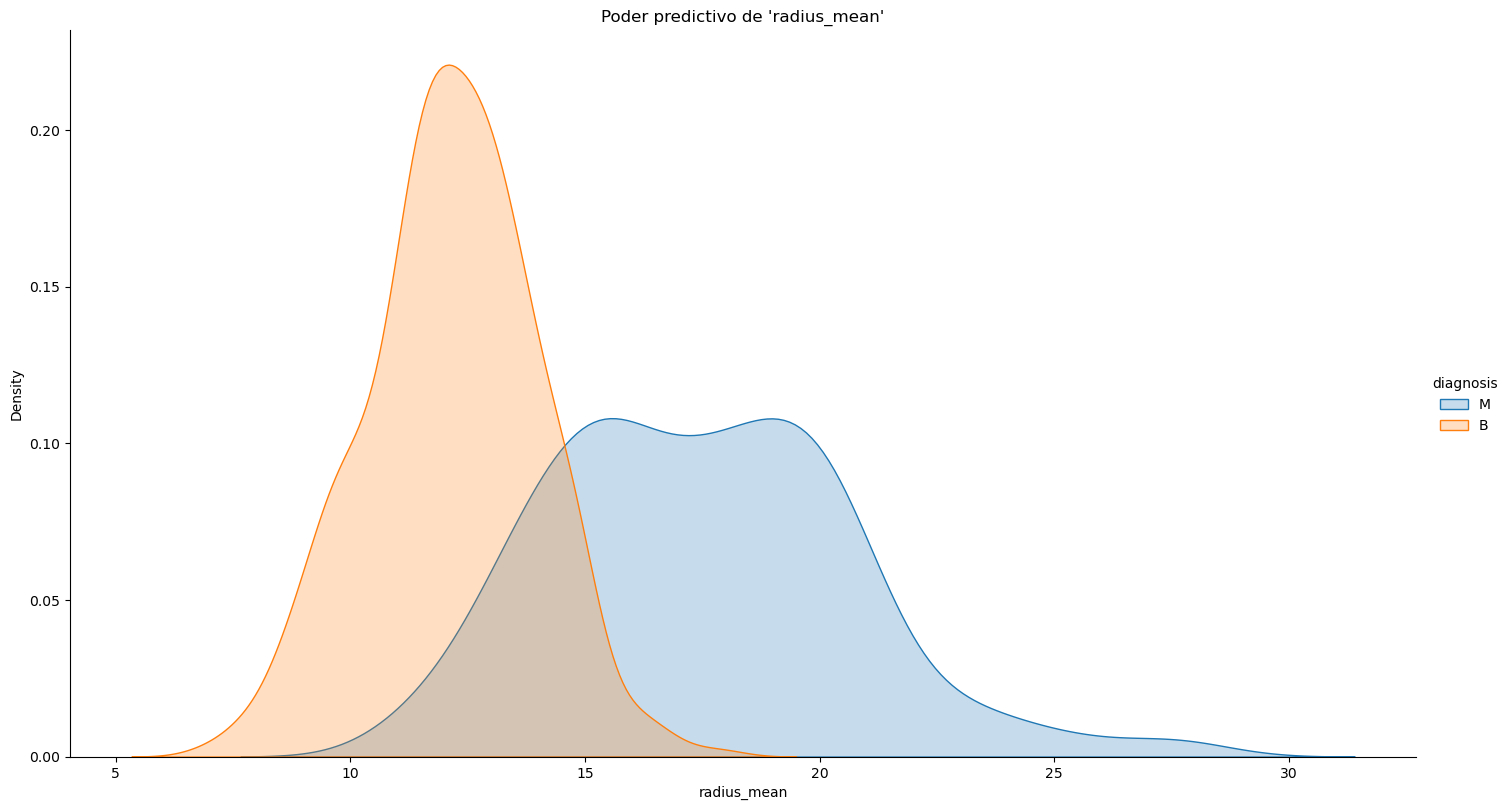

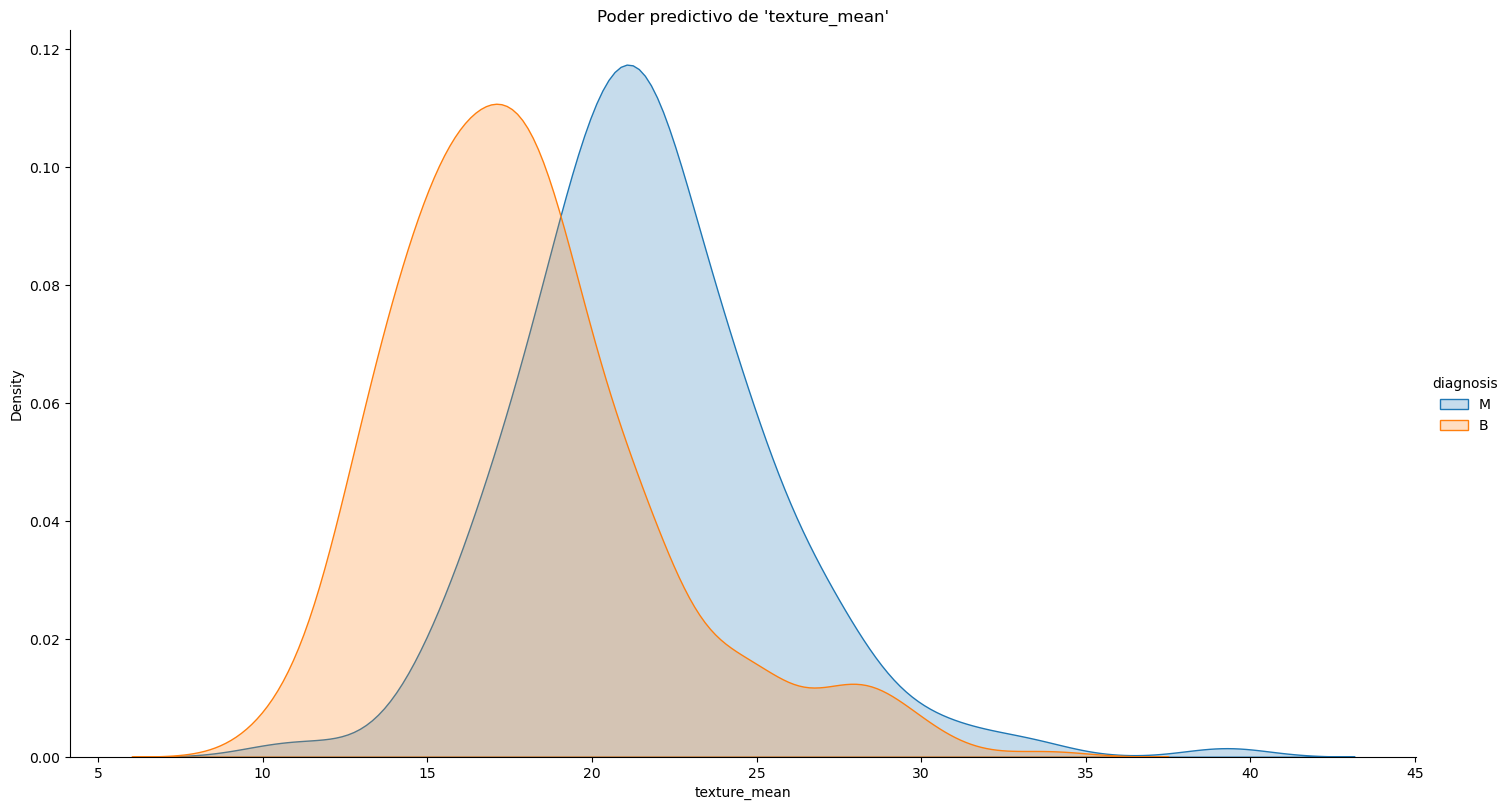

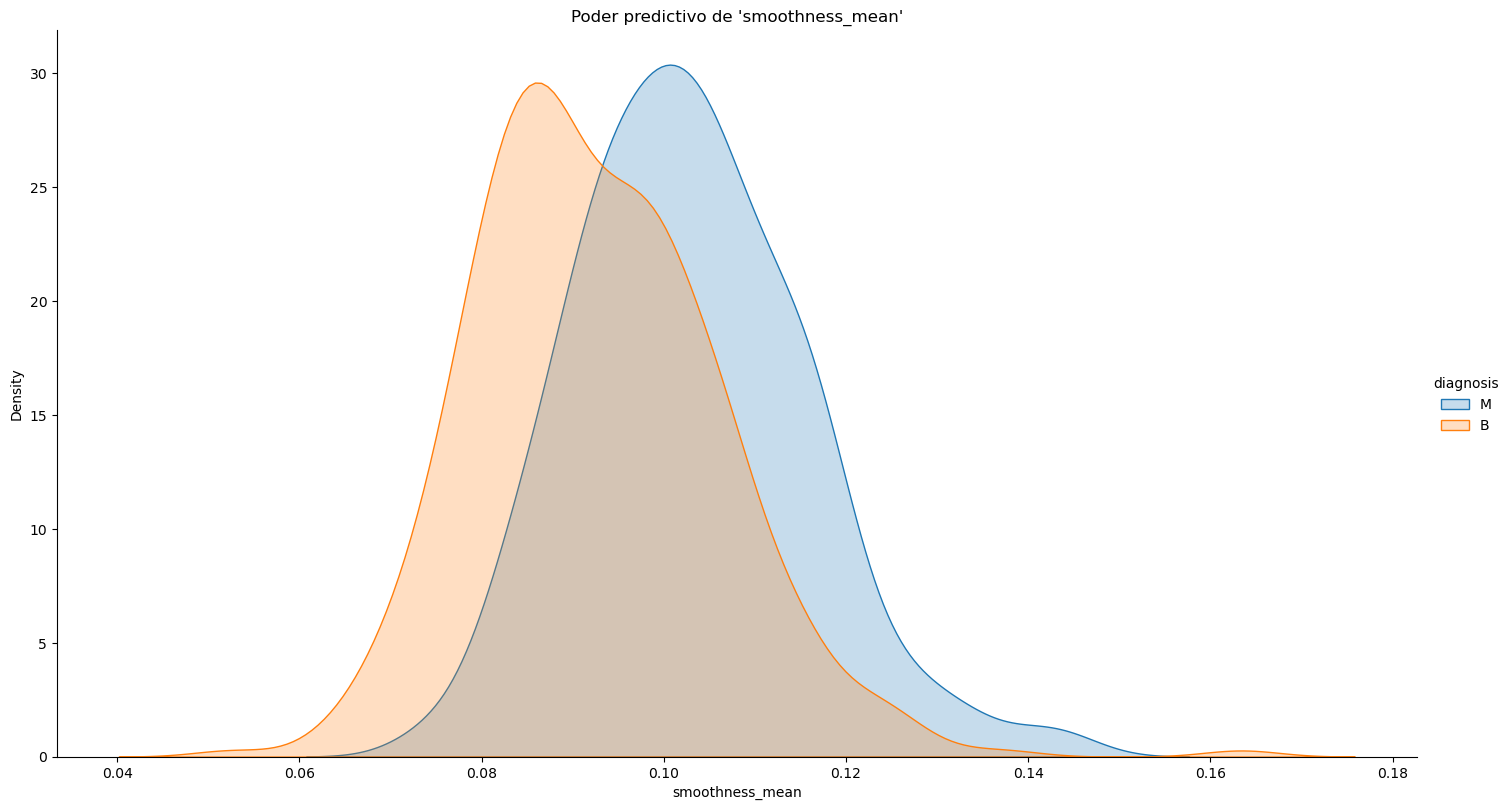

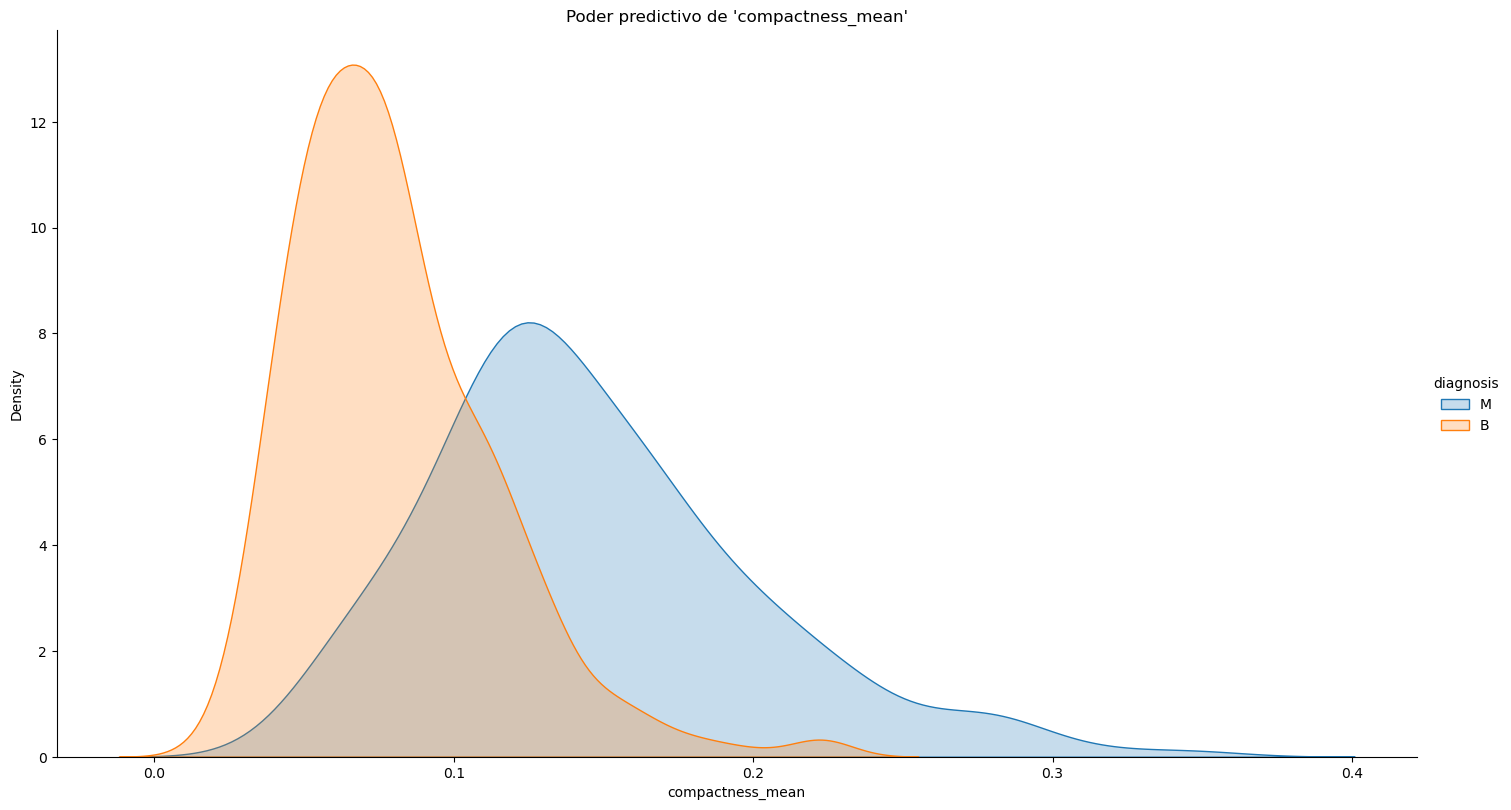

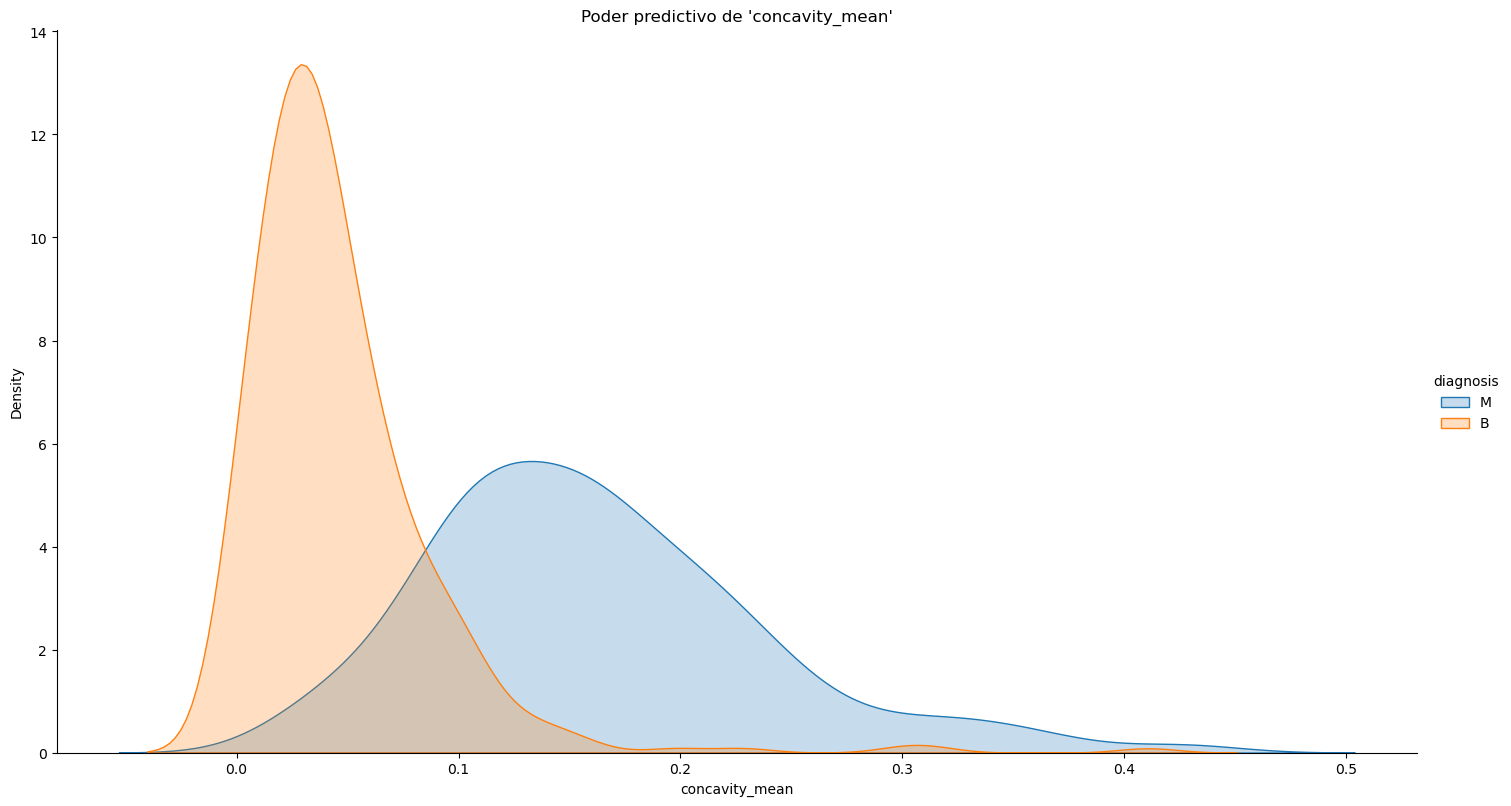

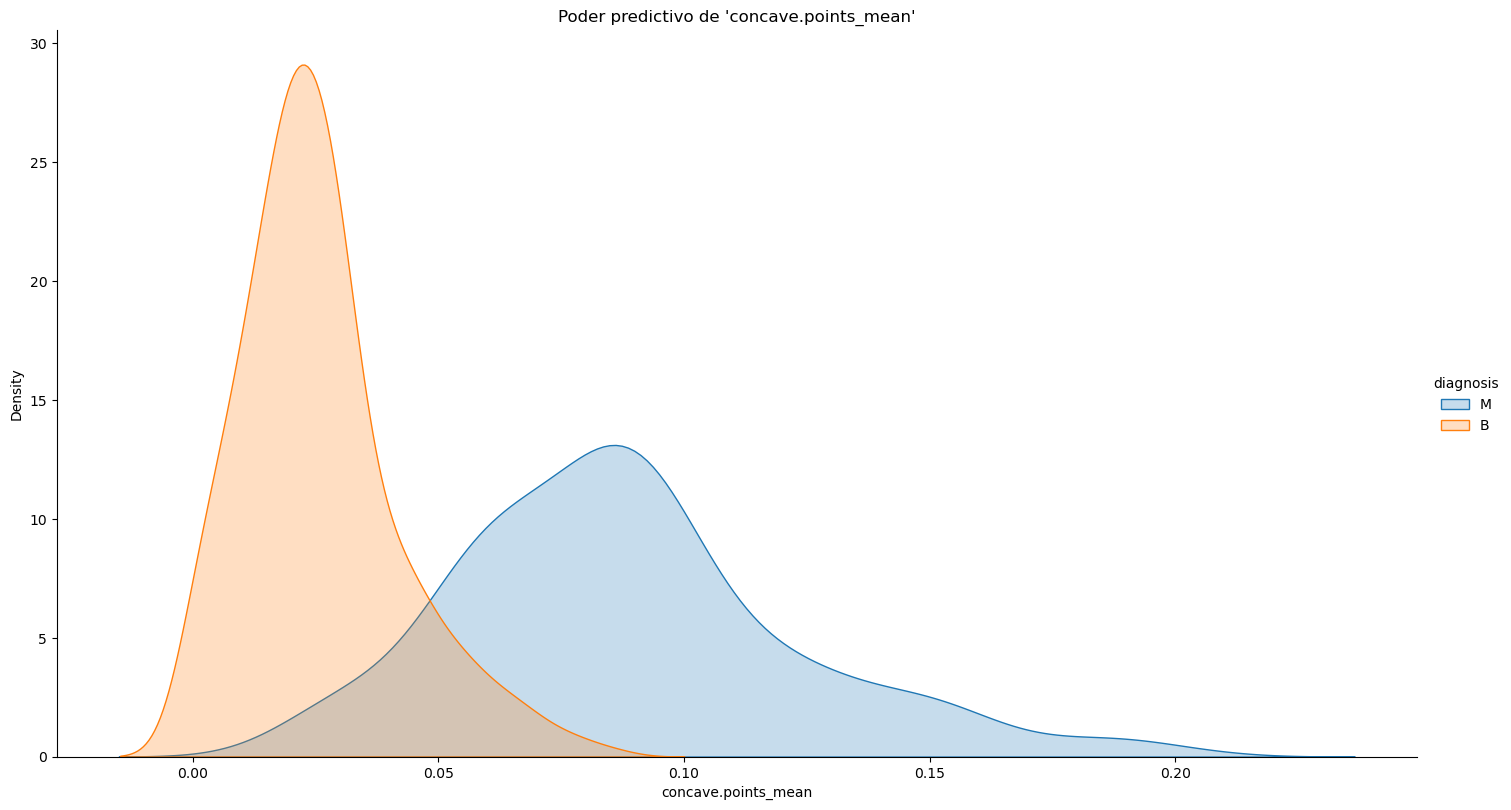

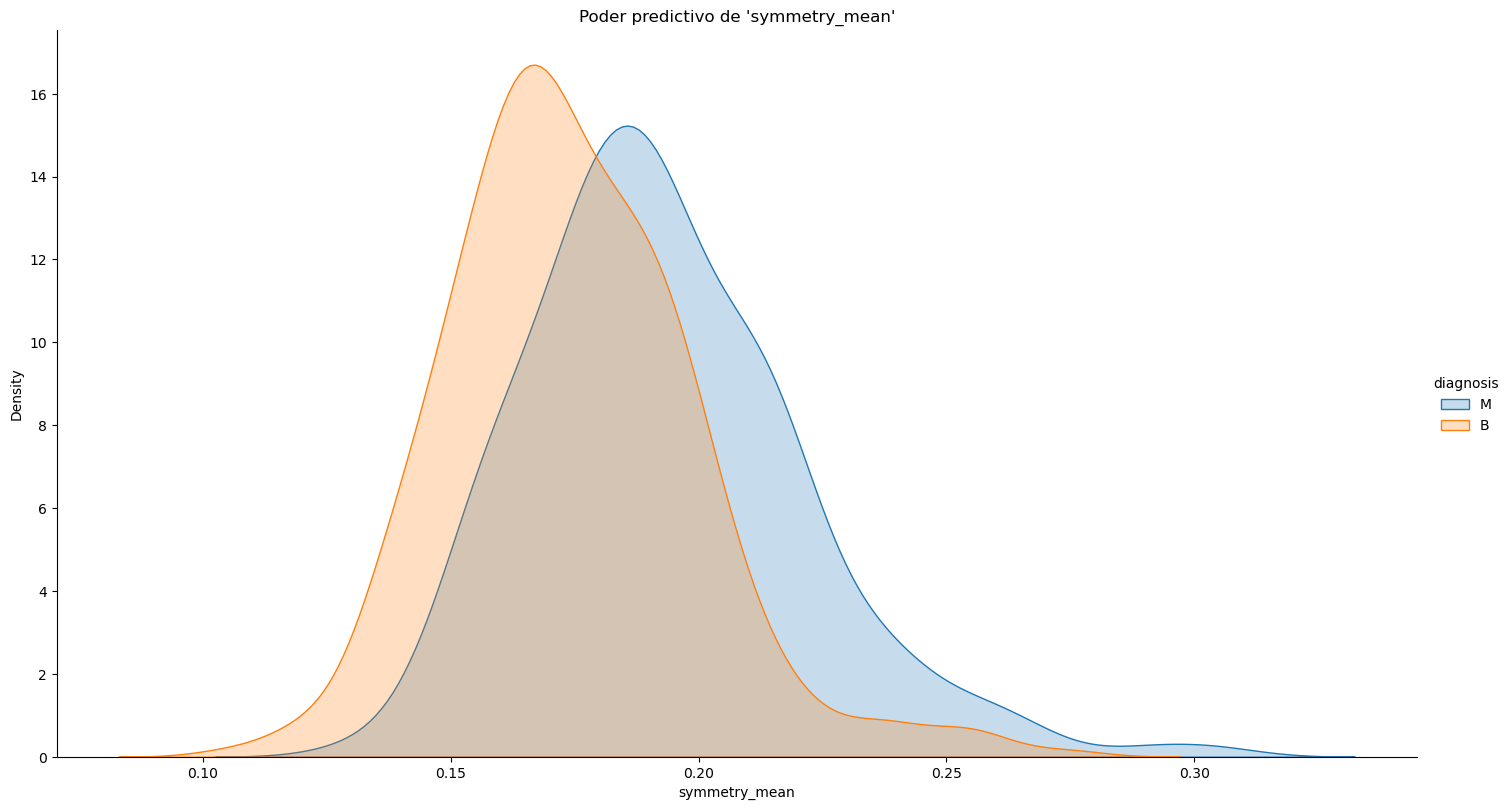

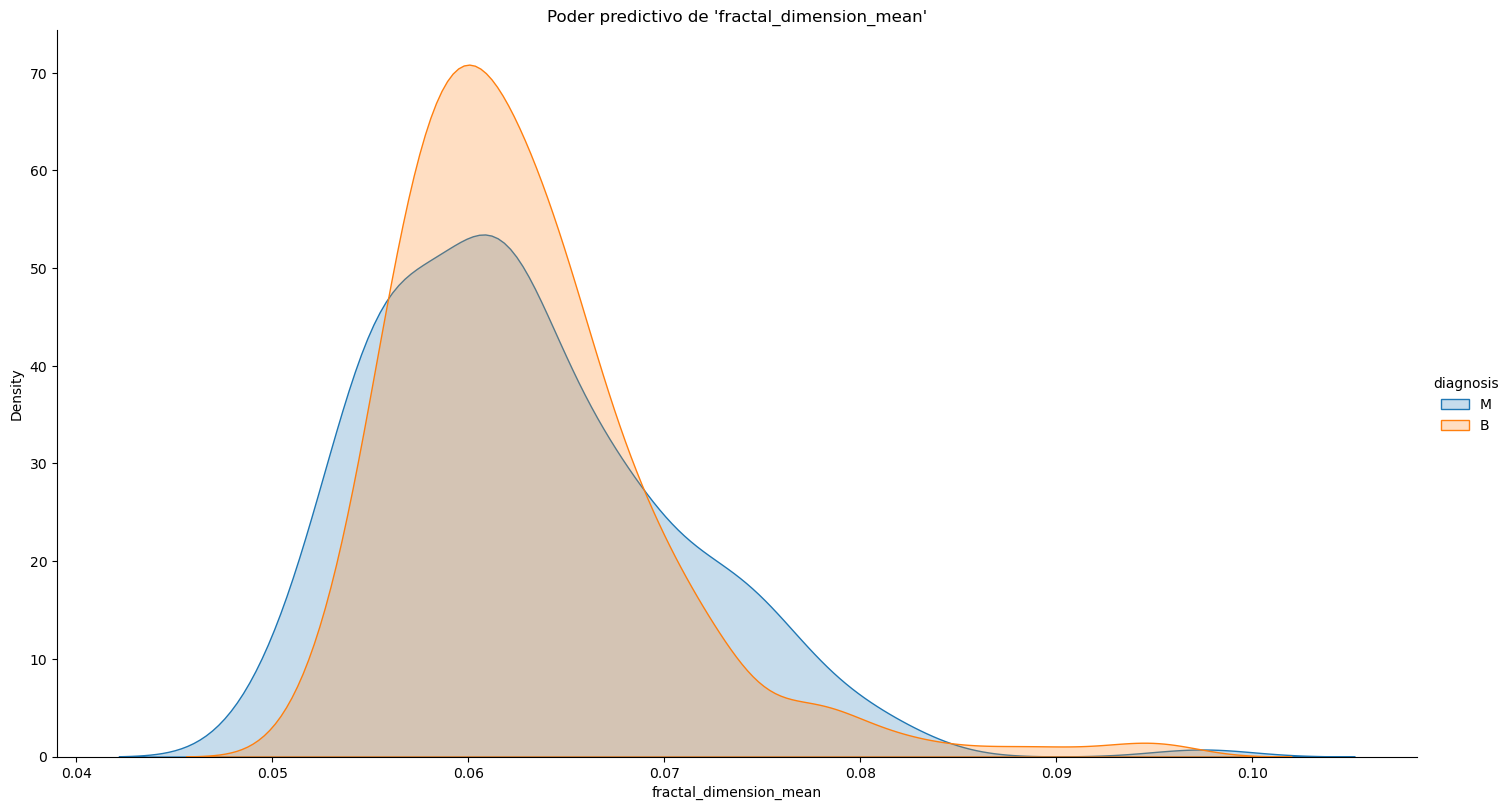

In [169]:
# Lista de variables a graficar
variables = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean",
             "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean"]

# Iterar sobre cada variable y generar el gráfico
for variable in variables:
    analisis_linear.poder_predictivo_numerica(variable)
    plt.title(f"Poder predictivo de '{variable}'")
    plt.show()


## Analisis_poly

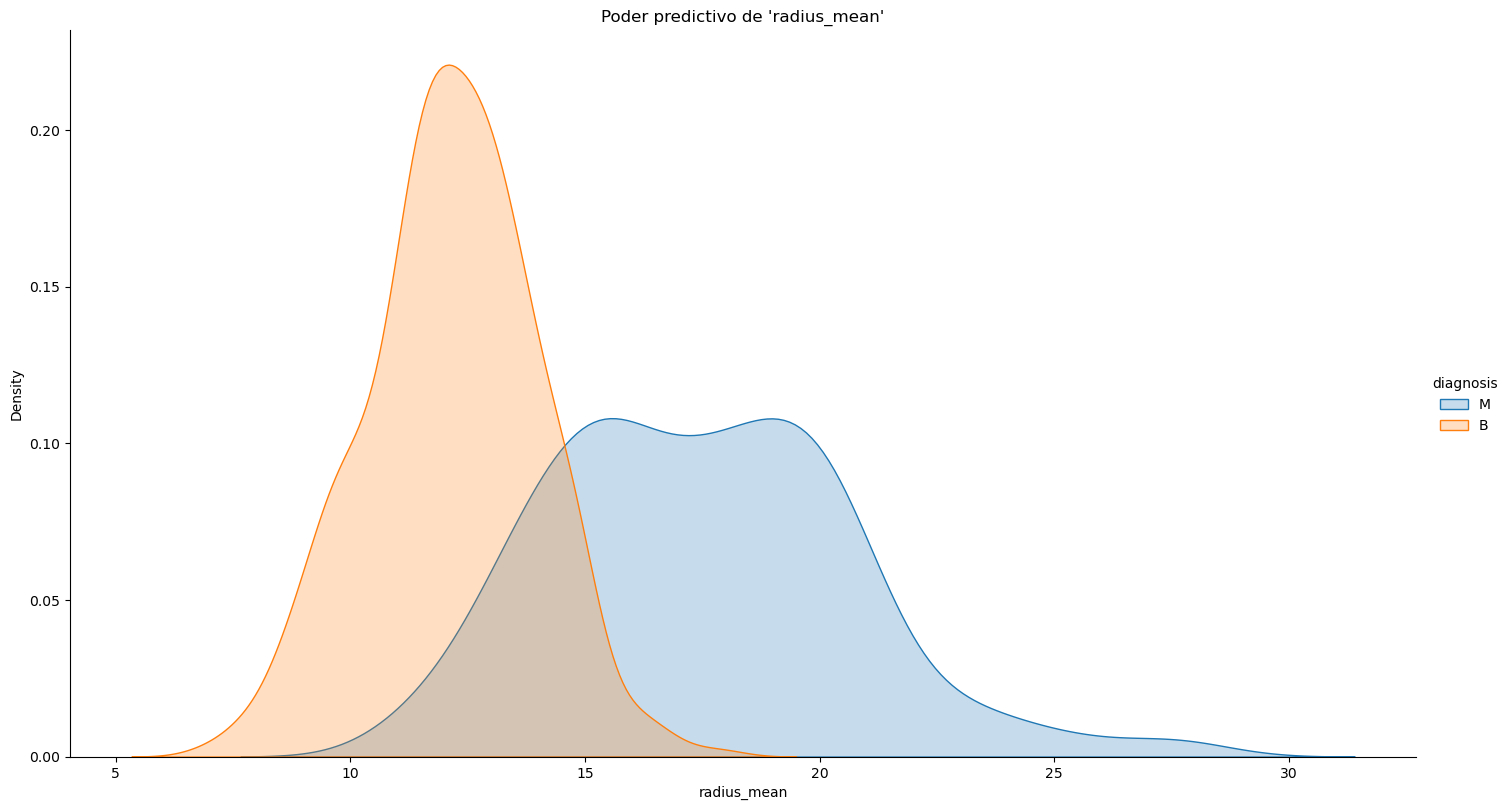

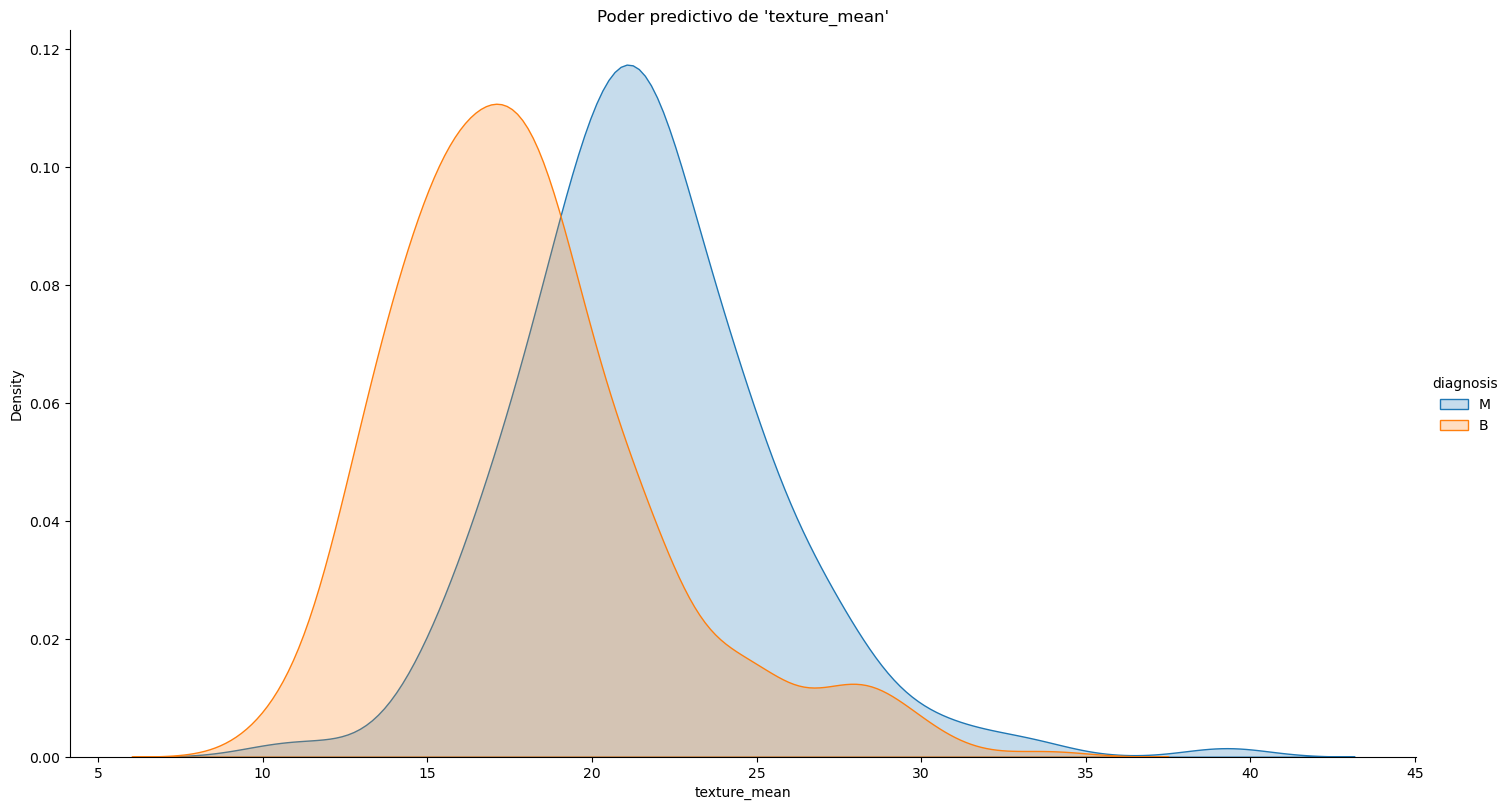

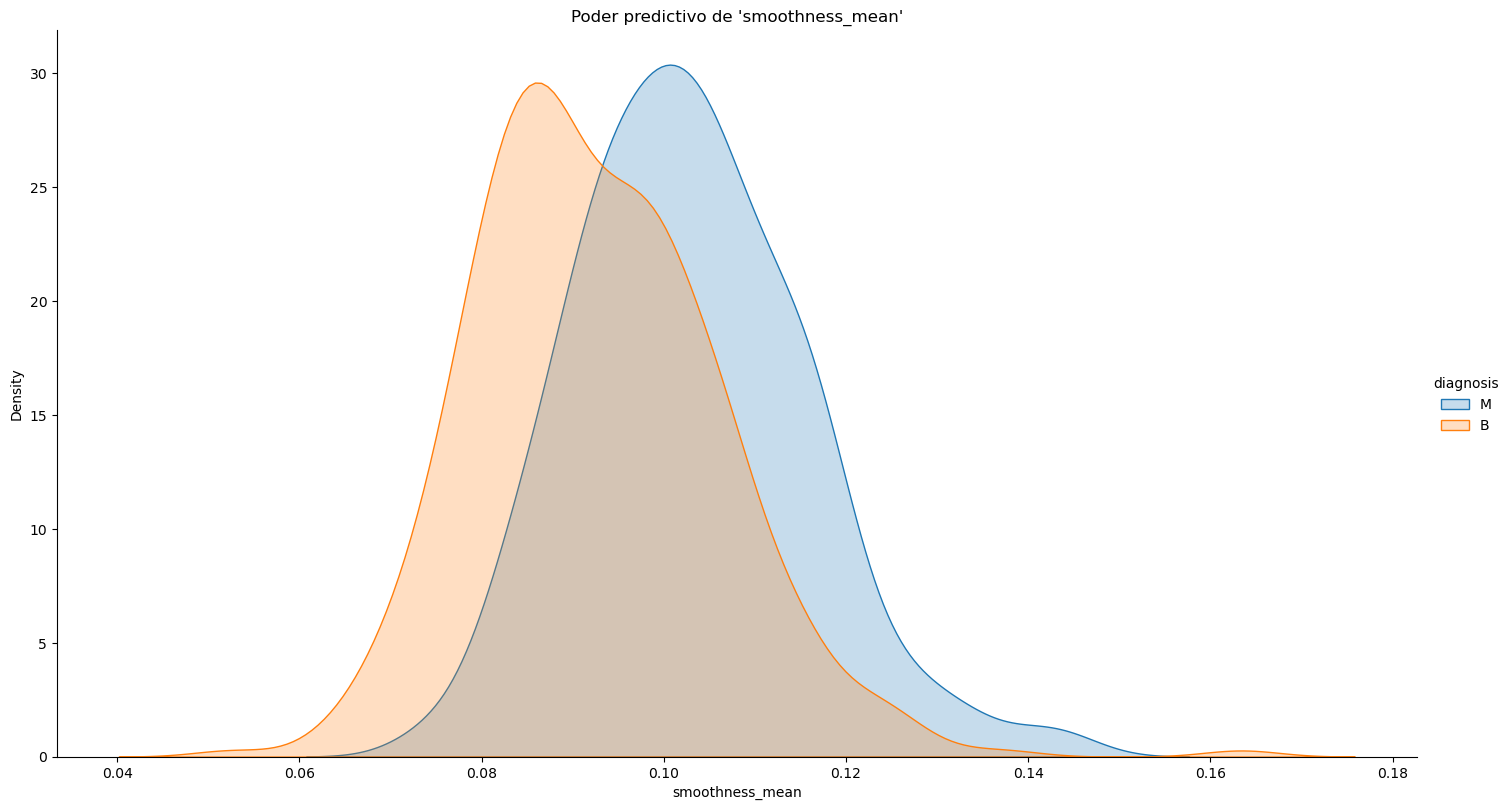

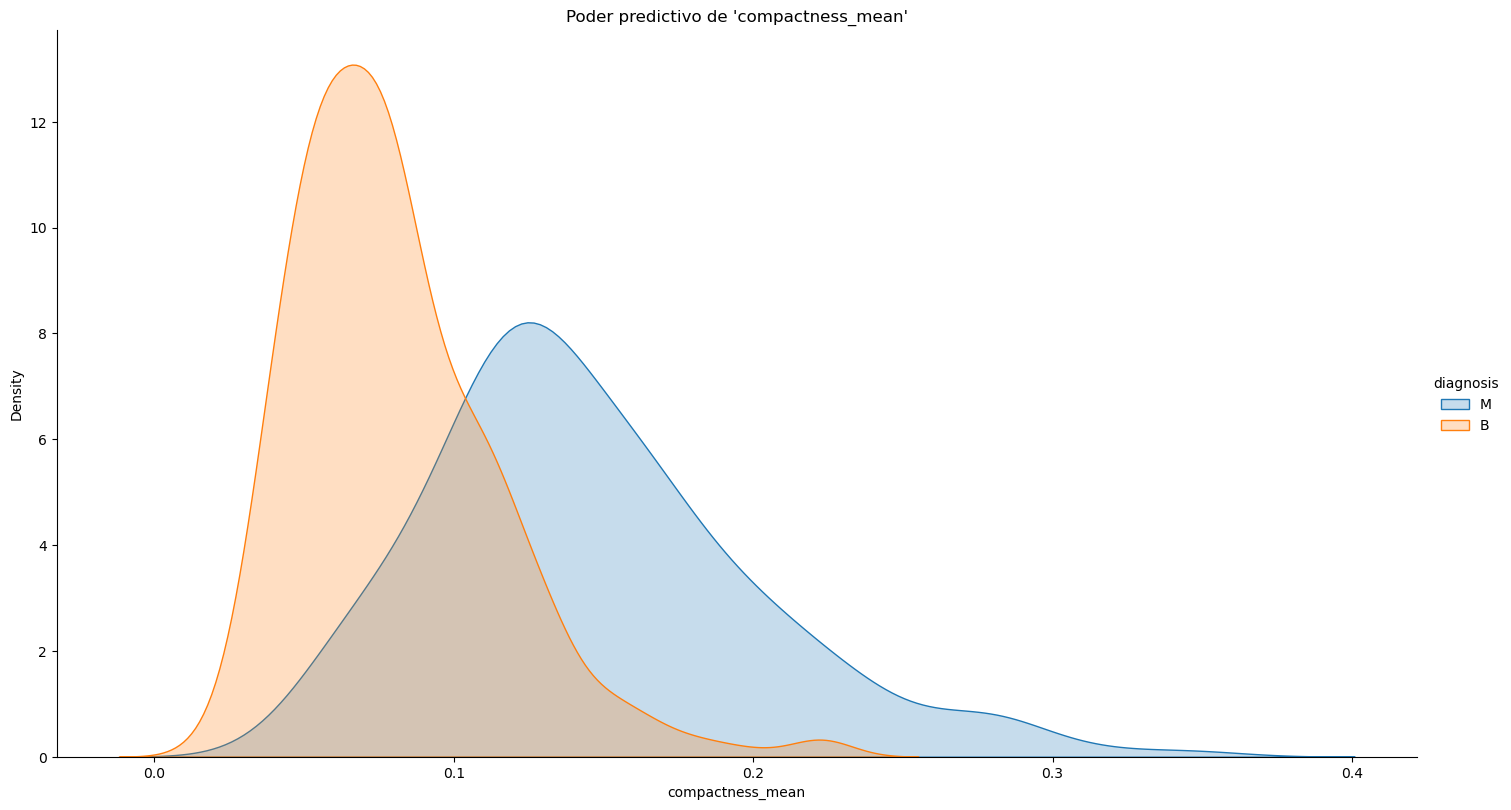

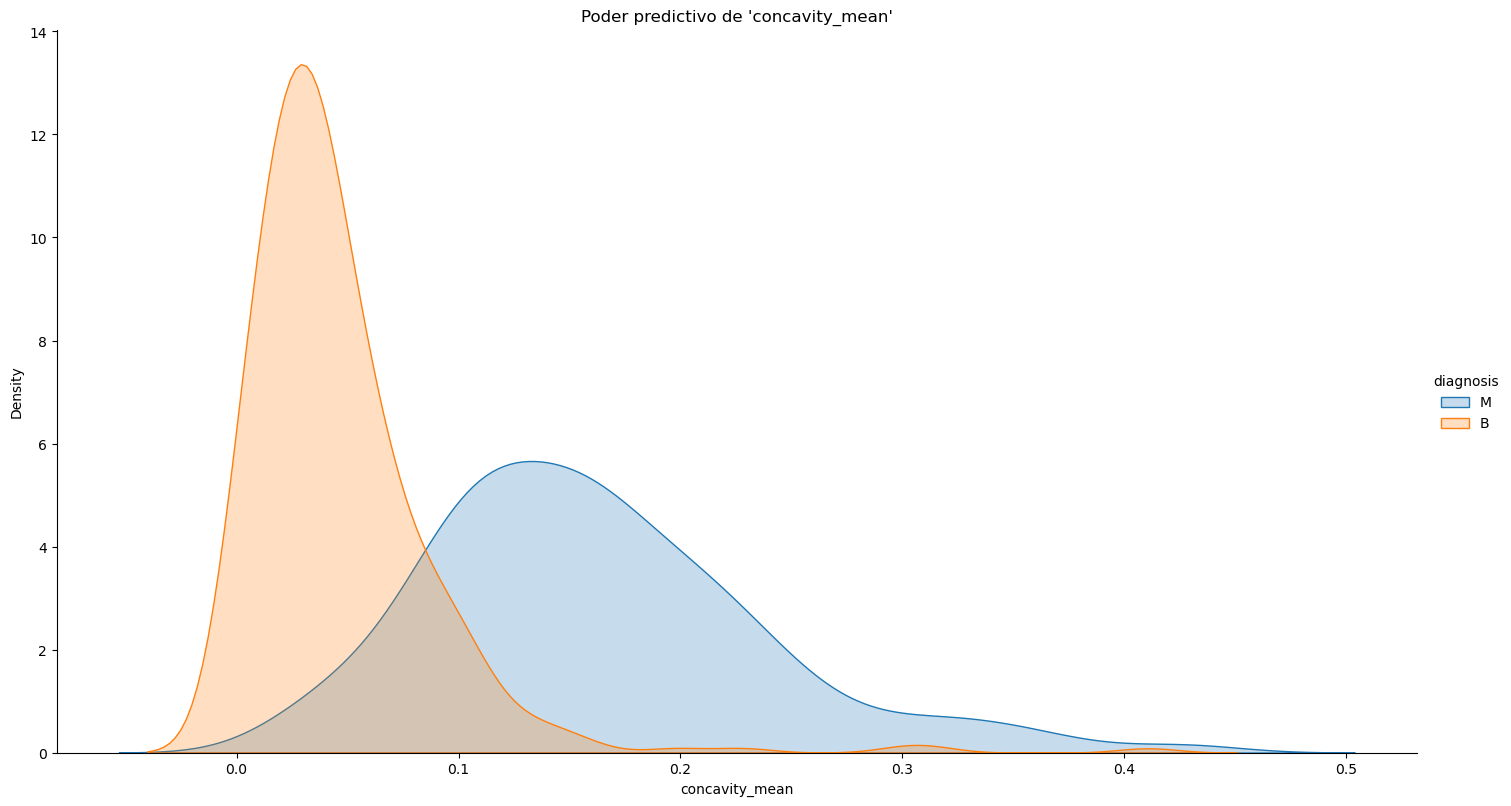

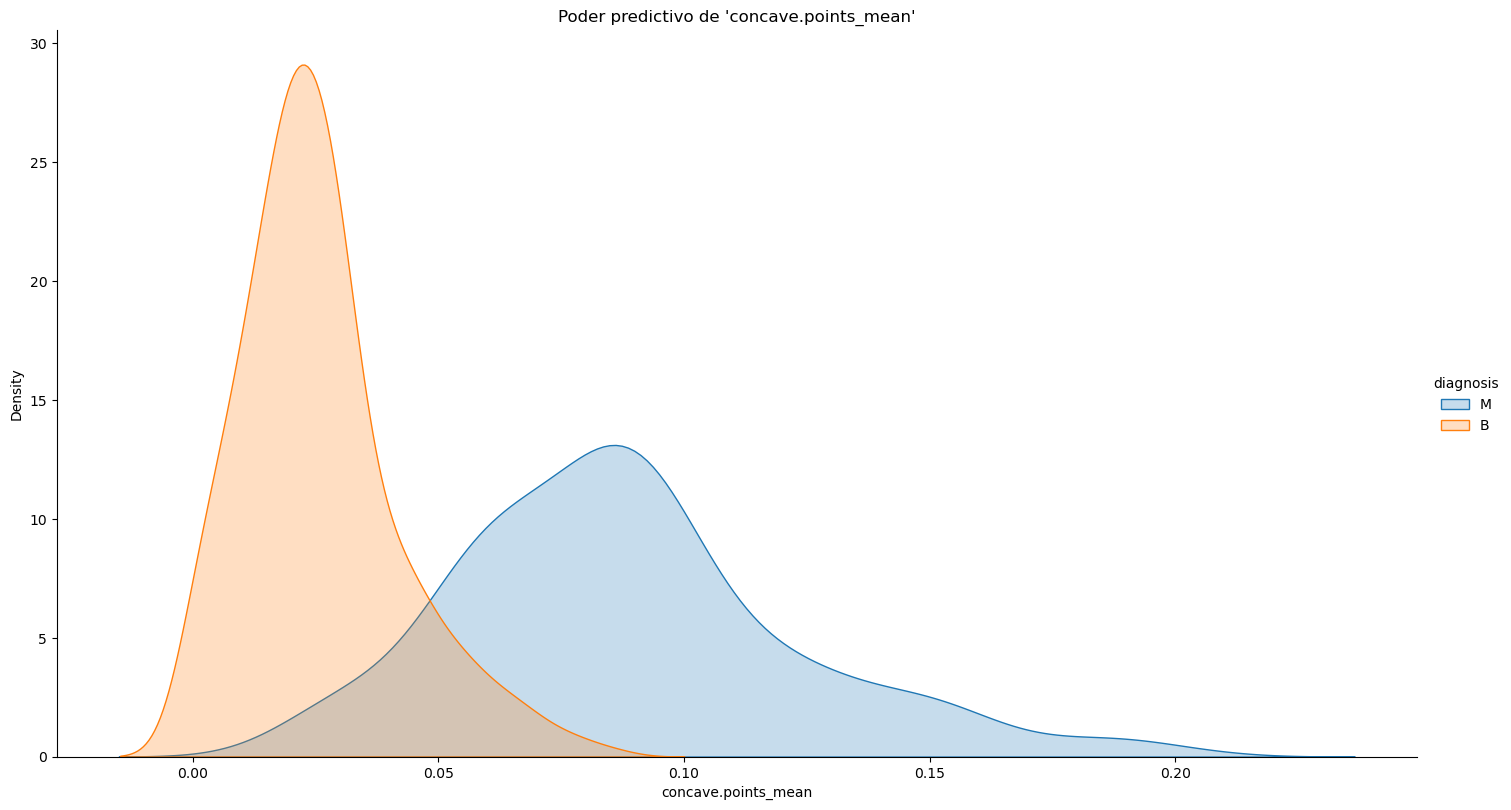

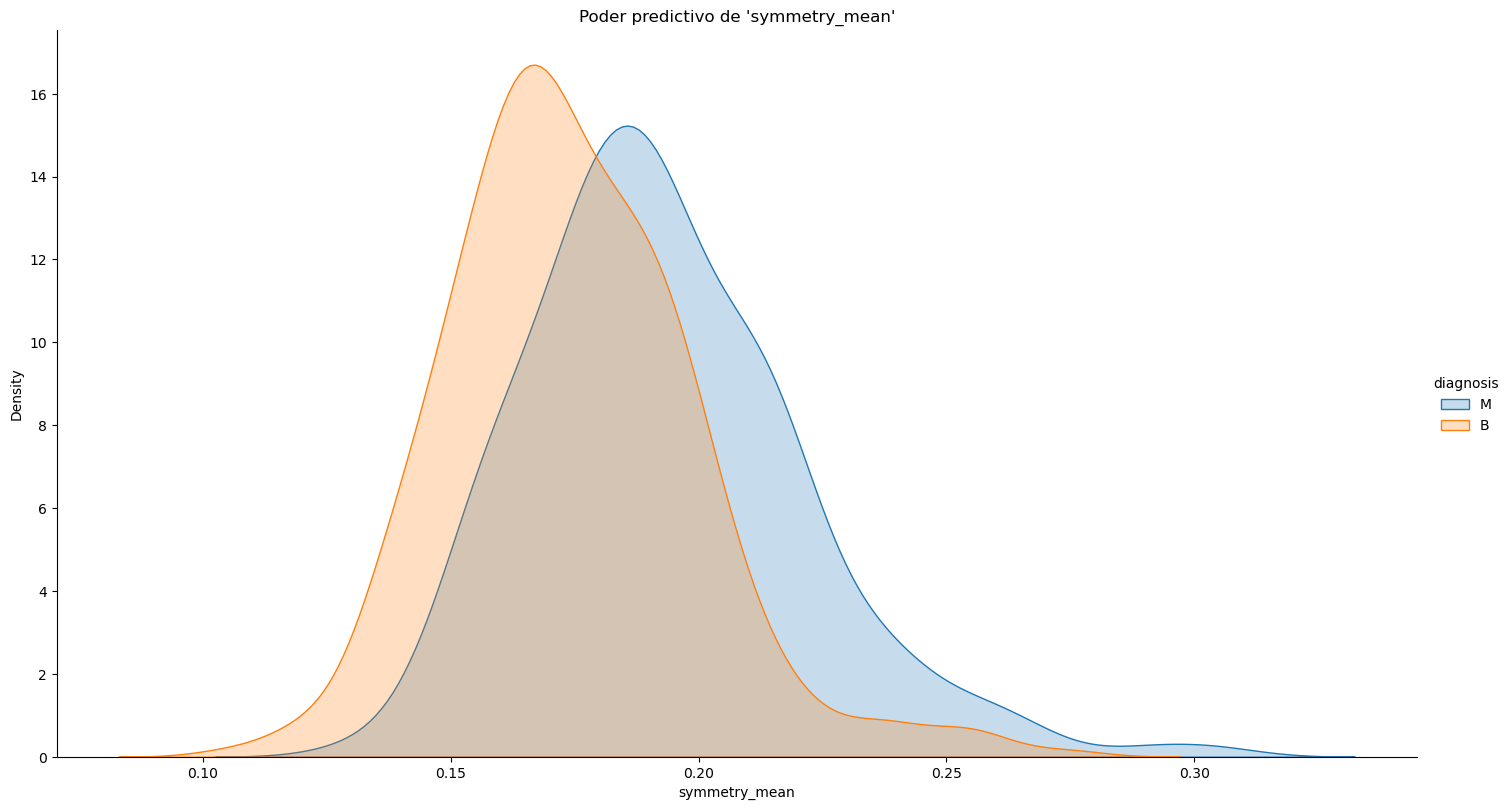

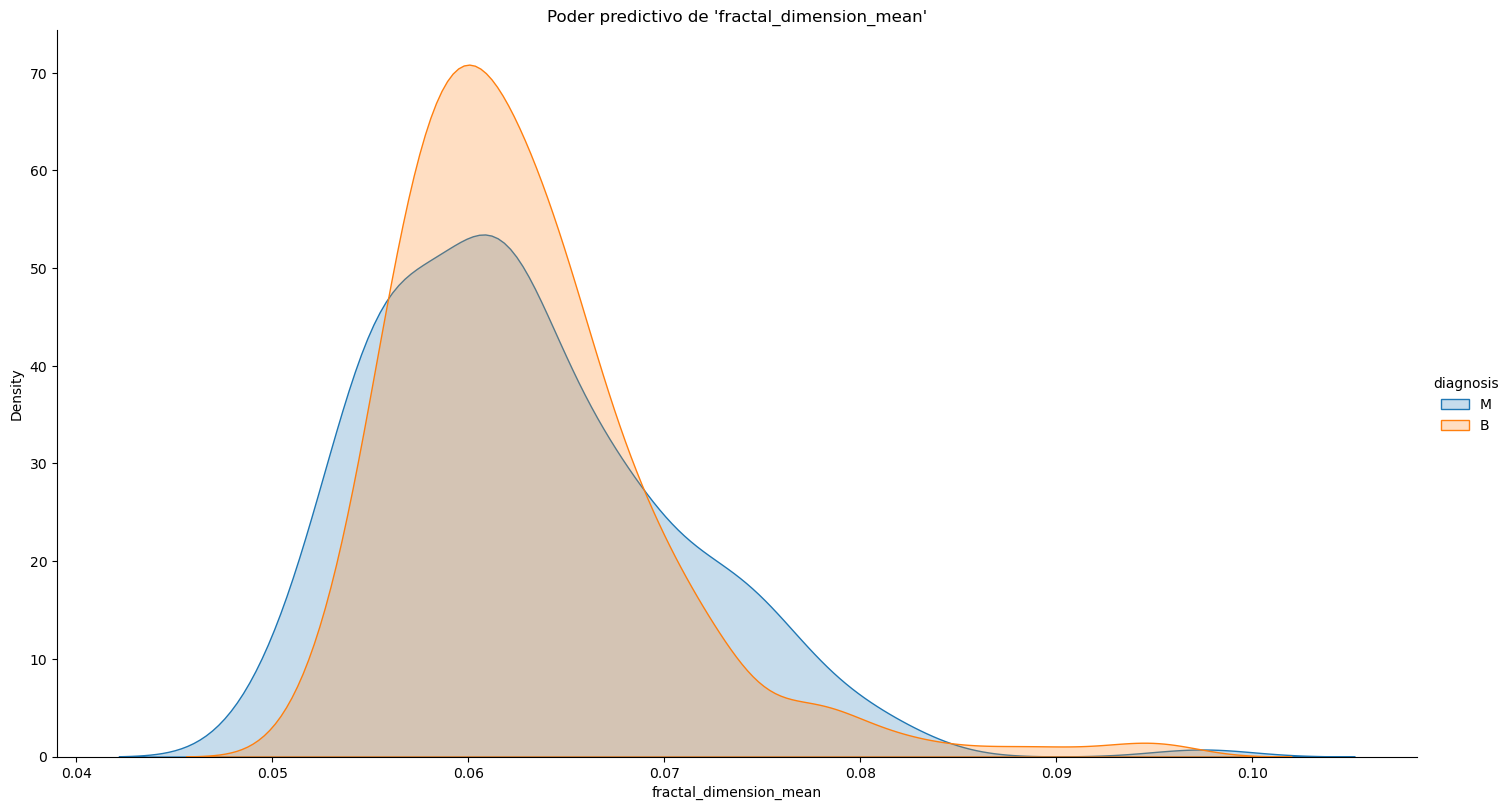

In [170]:
# Lista de variables a graficar
variables = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean",
             "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean"]

# Iterar sobre cada variable y generar el gráfico
for variable in variables:
    analisis_poly.poder_predictivo_numerica(variable)
    plt.title(f"Poder predictivo de '{variable}'")
    plt.show()


## Analisis_rbf

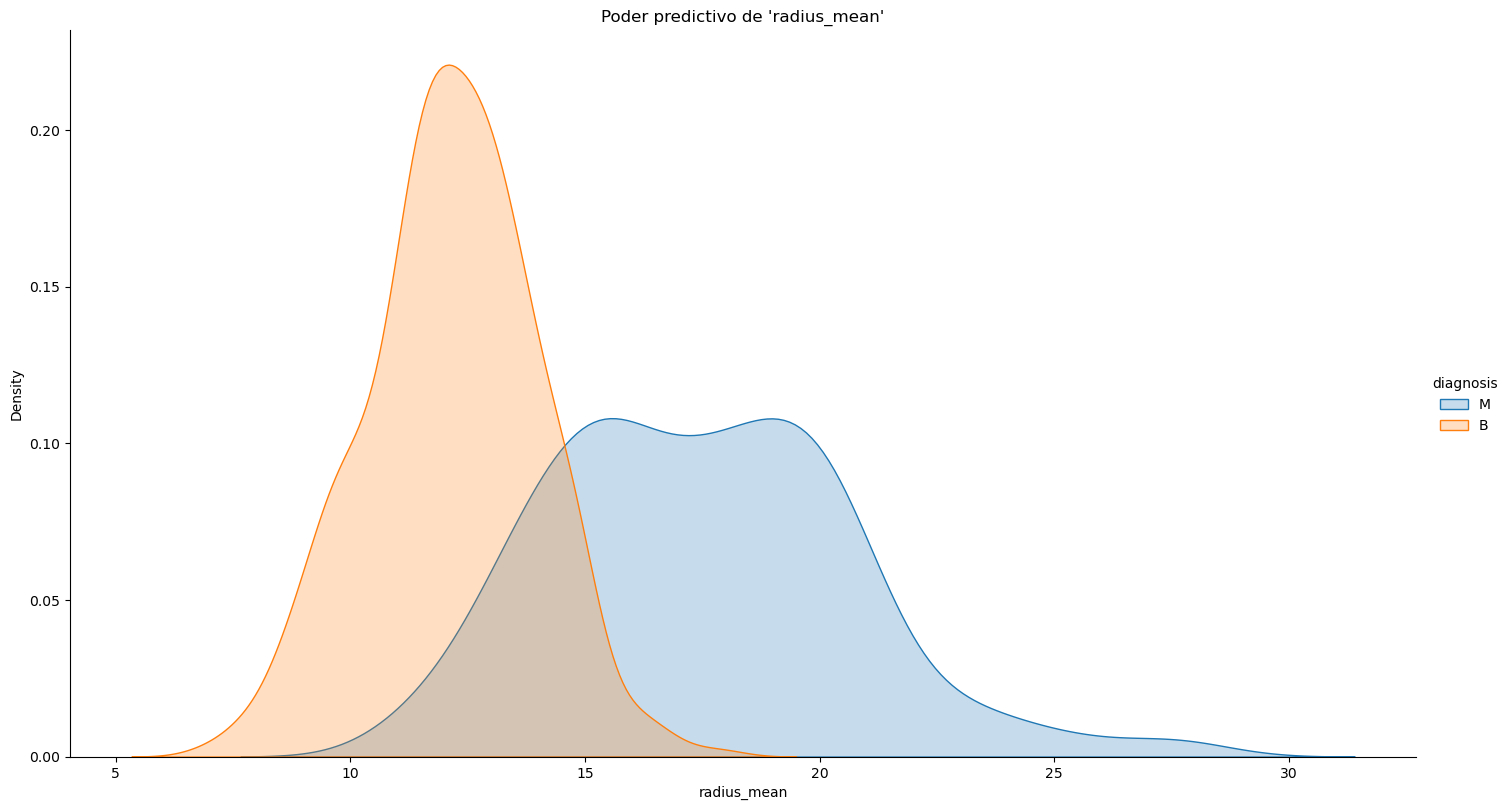

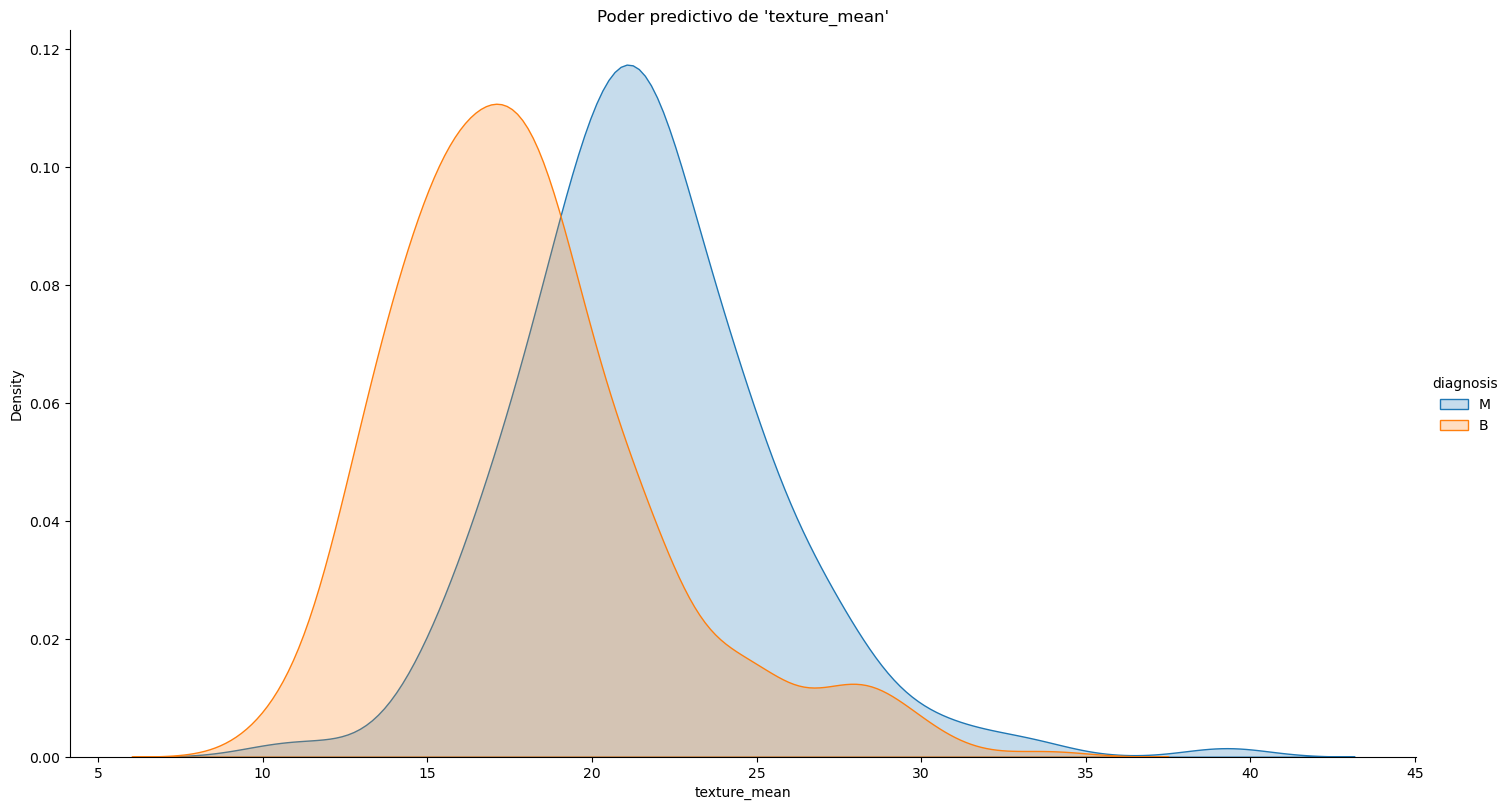

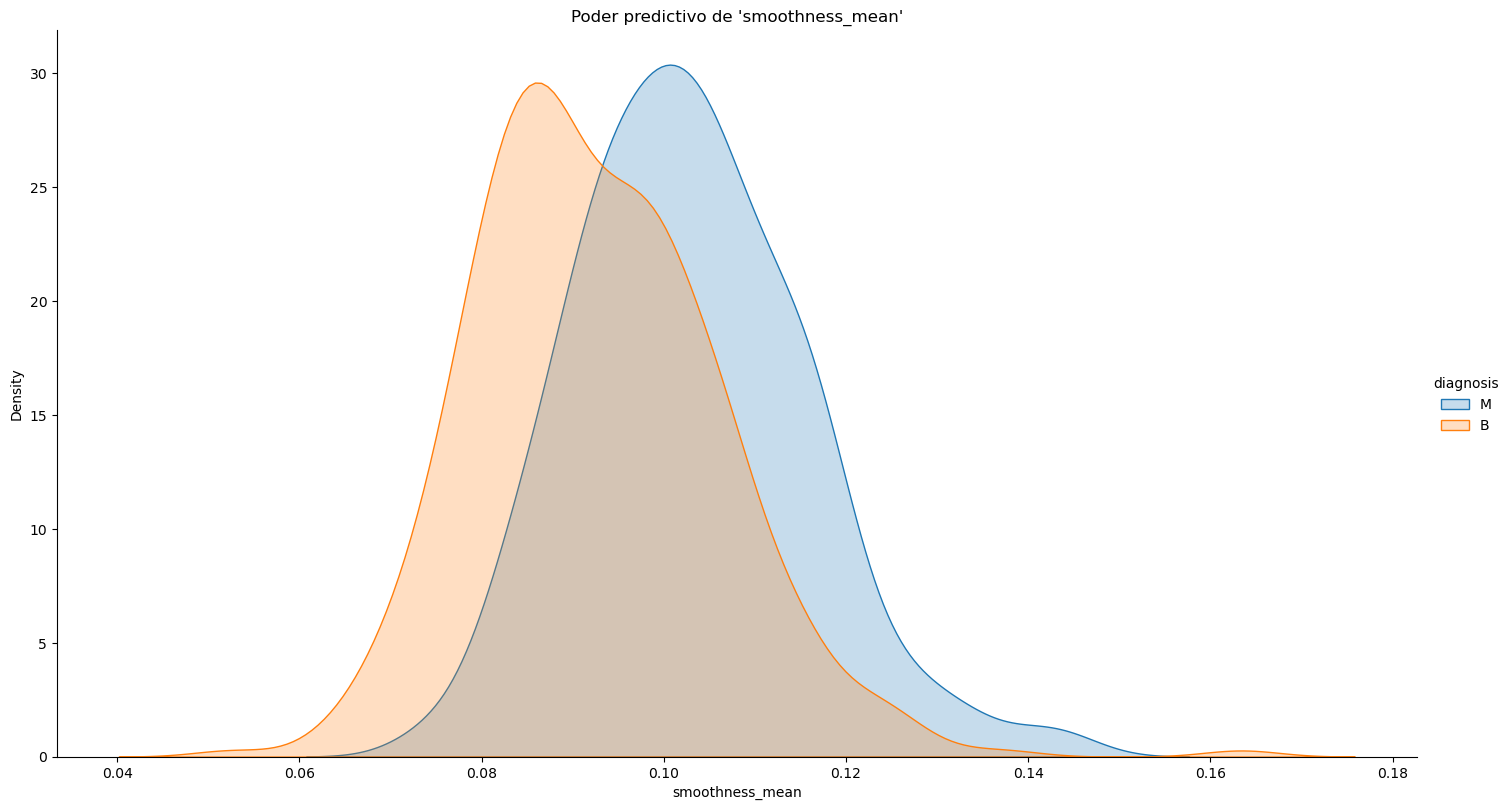

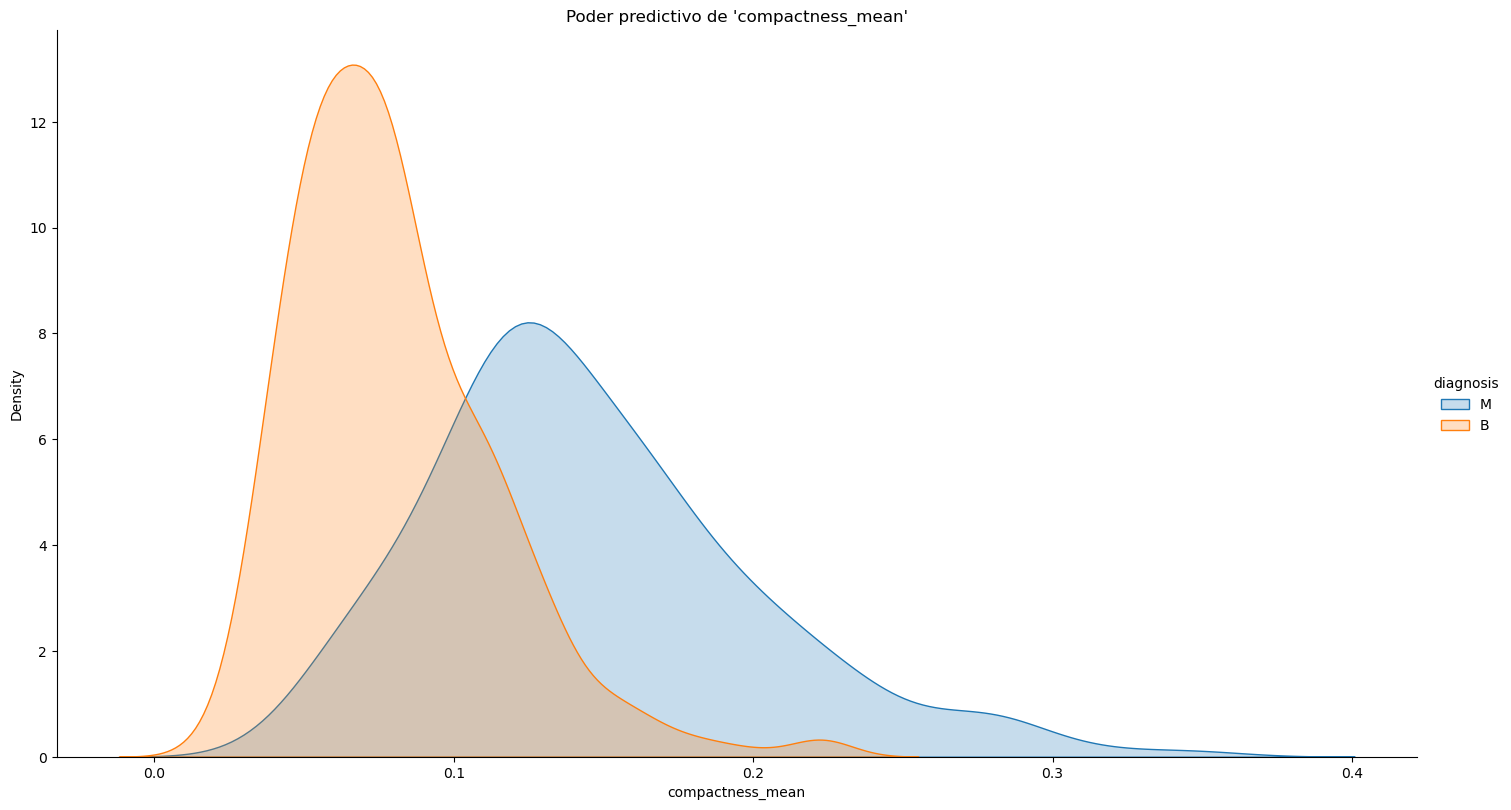

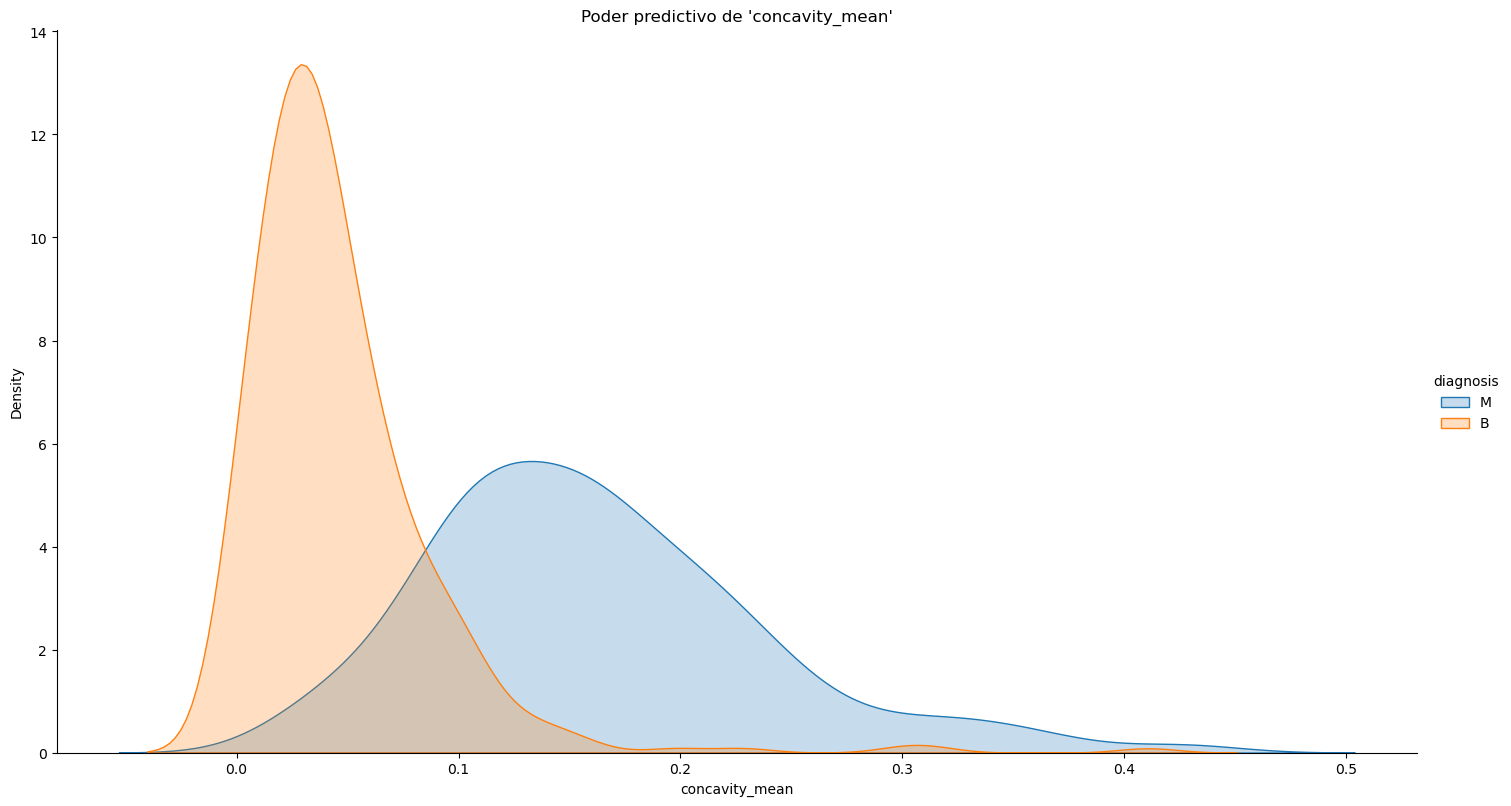

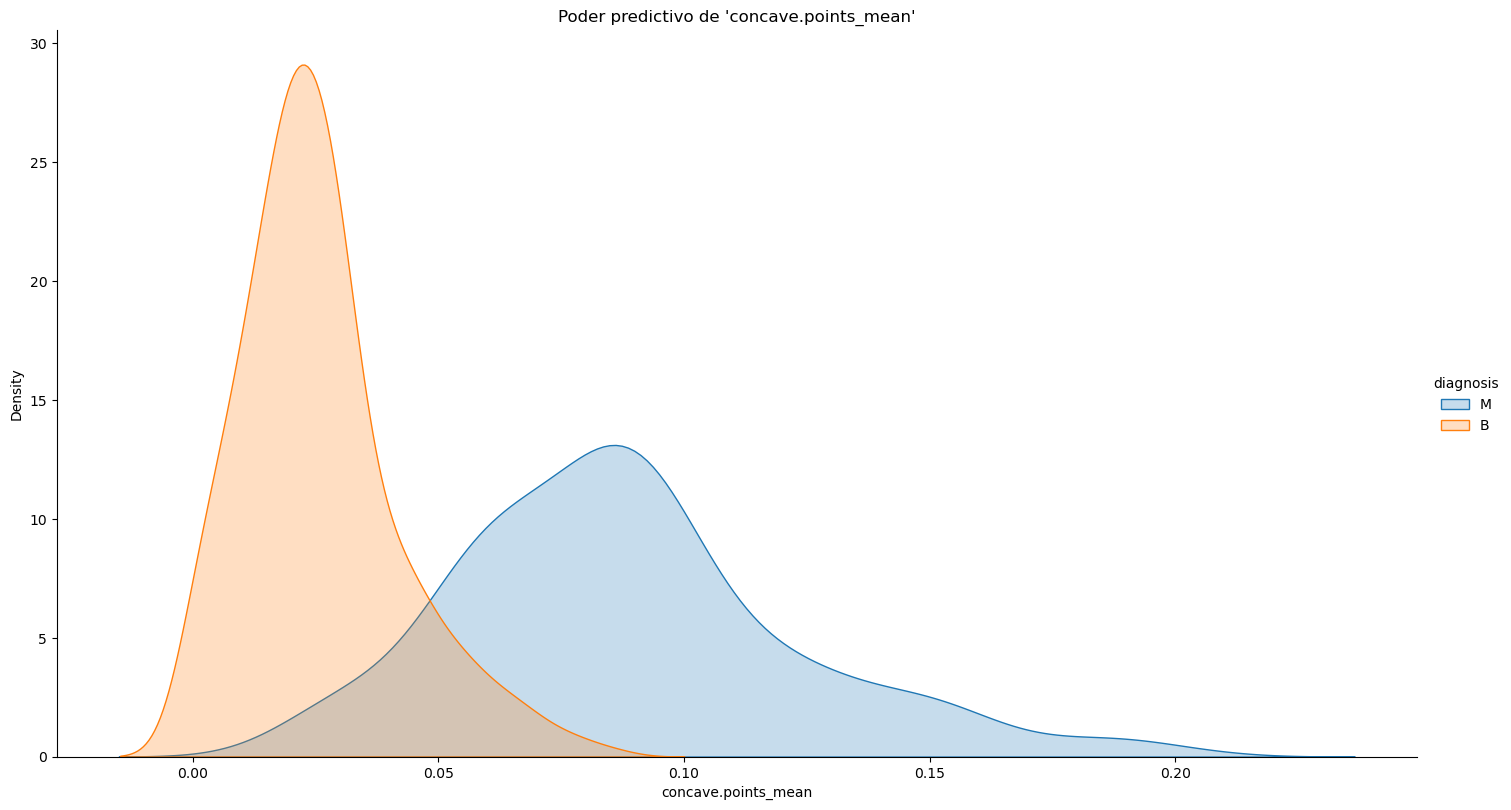

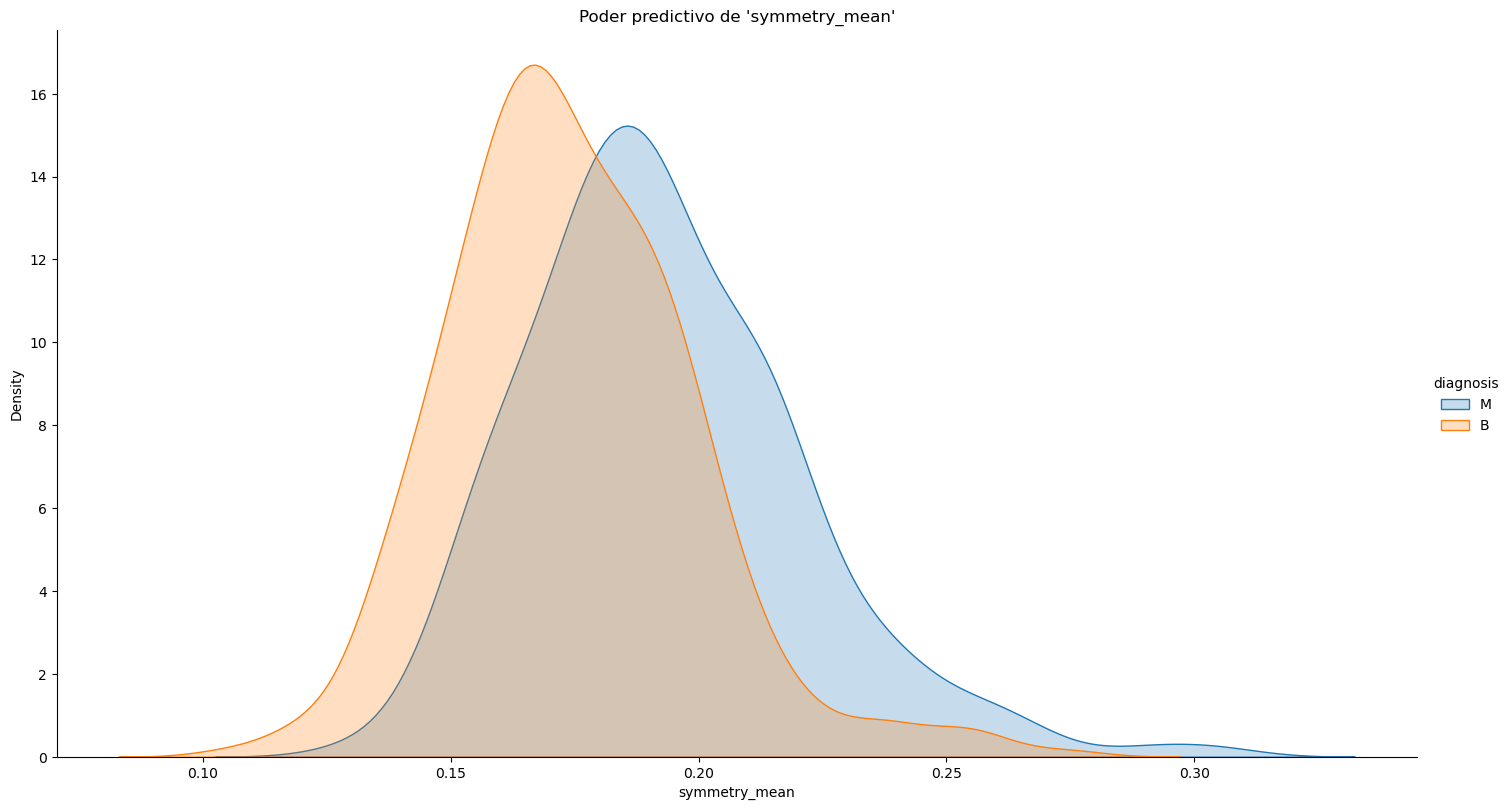

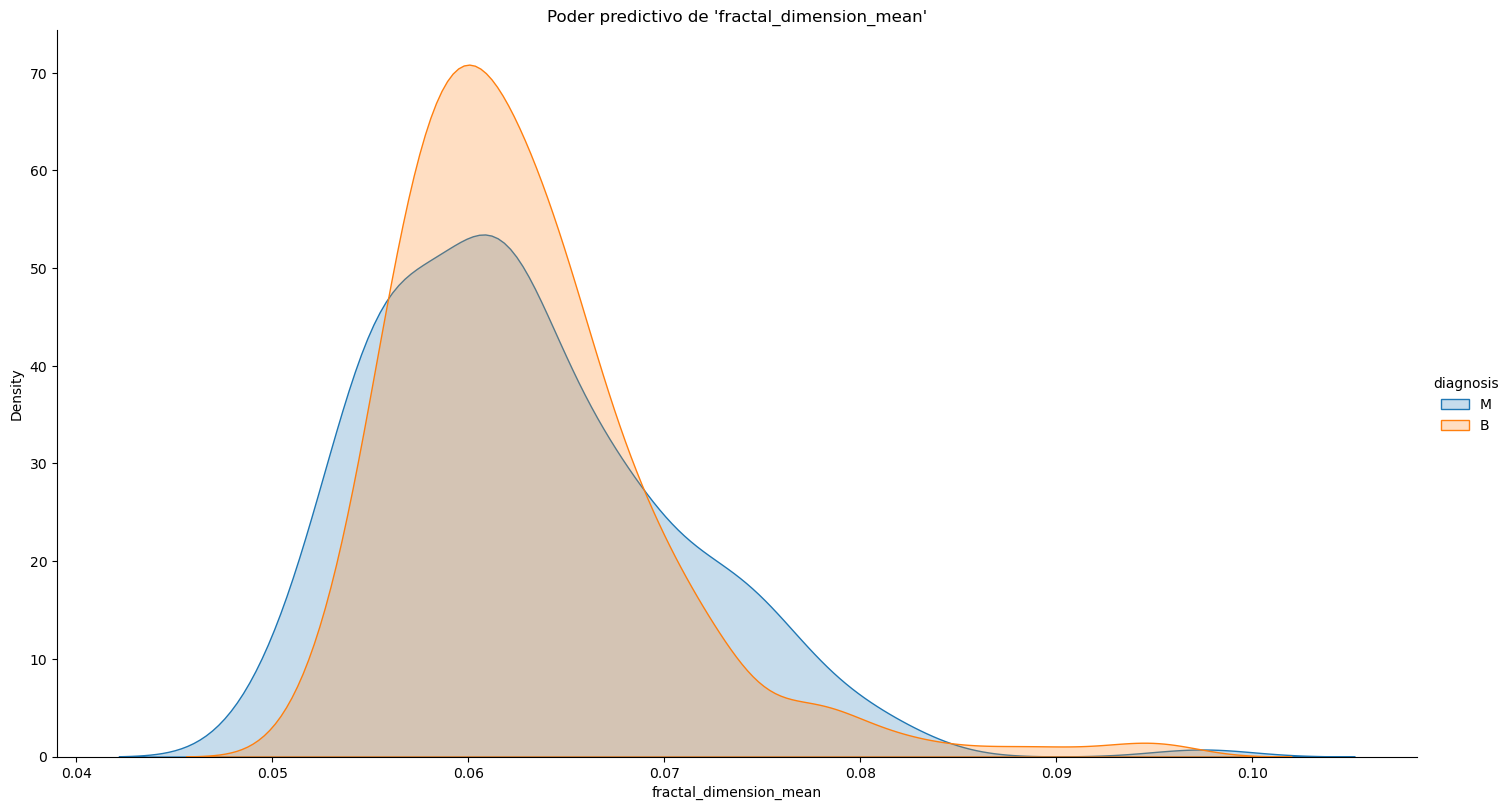

In [171]:
# Lista de variables a graficar
variables = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean",
             "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean"]

# Iterar sobre cada variable y generar el gráfico
for variable in variables:
    analisis_rbf.poder_predictivo_numerica(variable)
    plt.title(f"Poder predictivo de '{variable}'")
    plt.show()


## Analisis_sigmoid

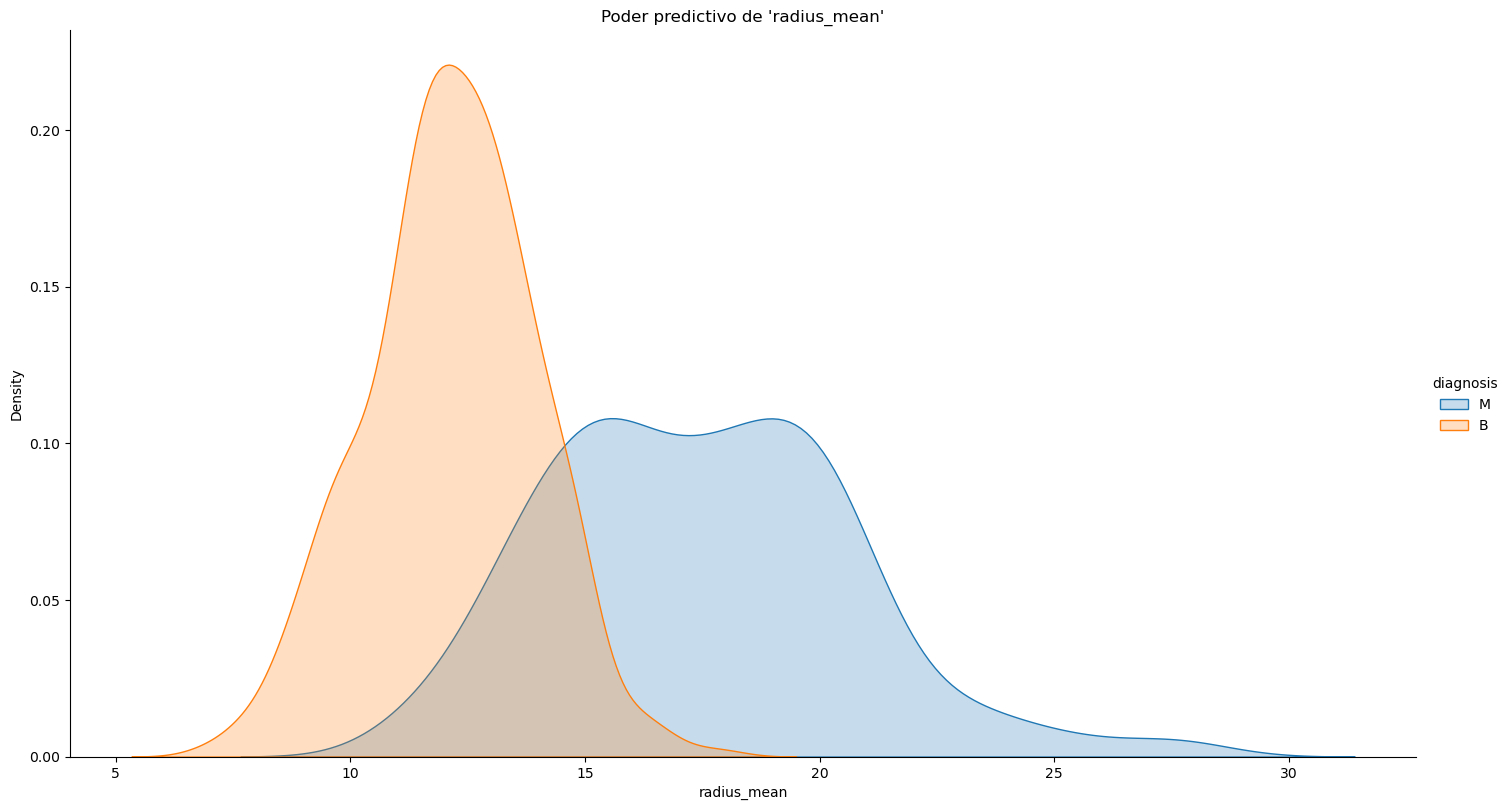

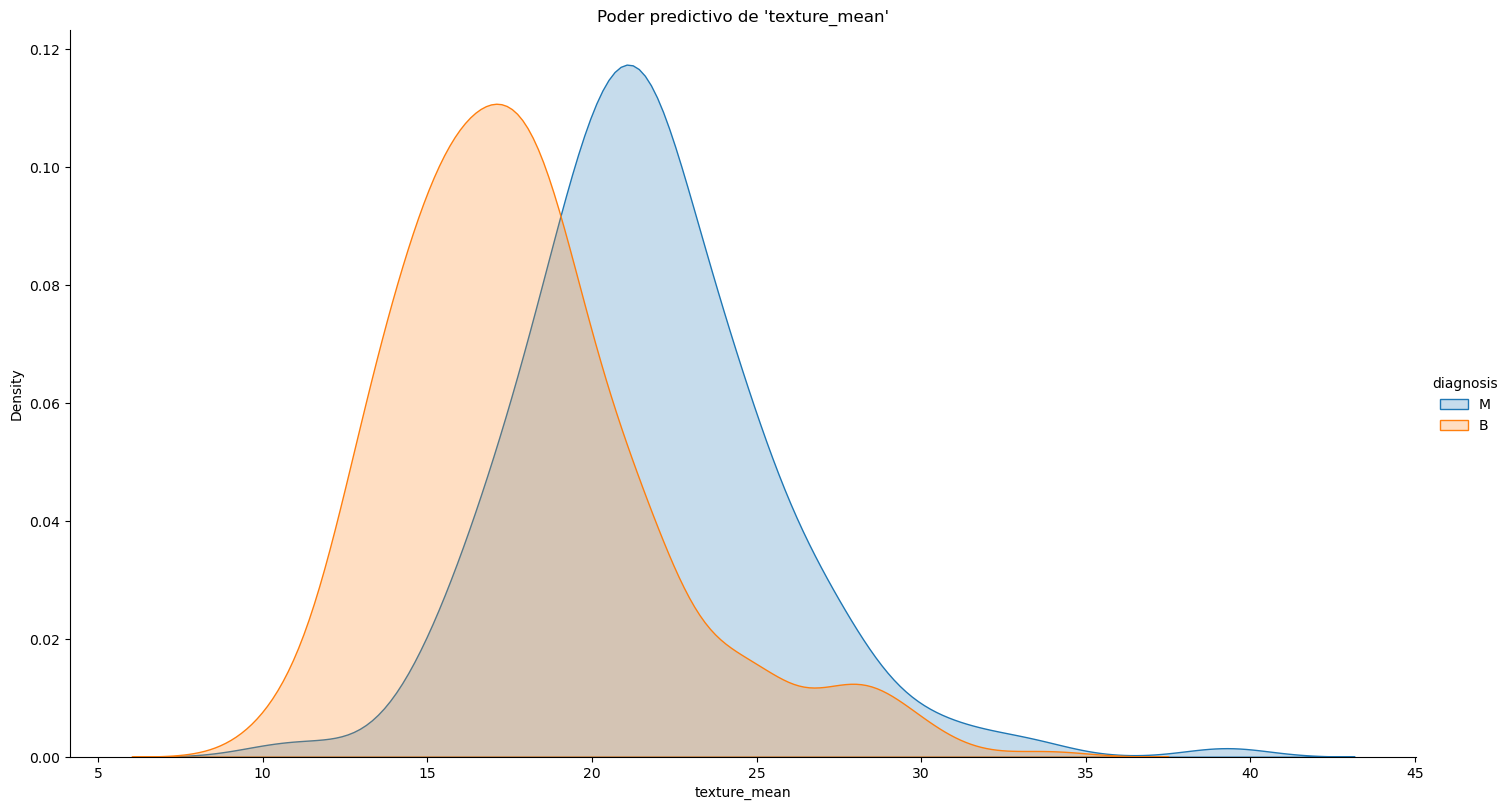

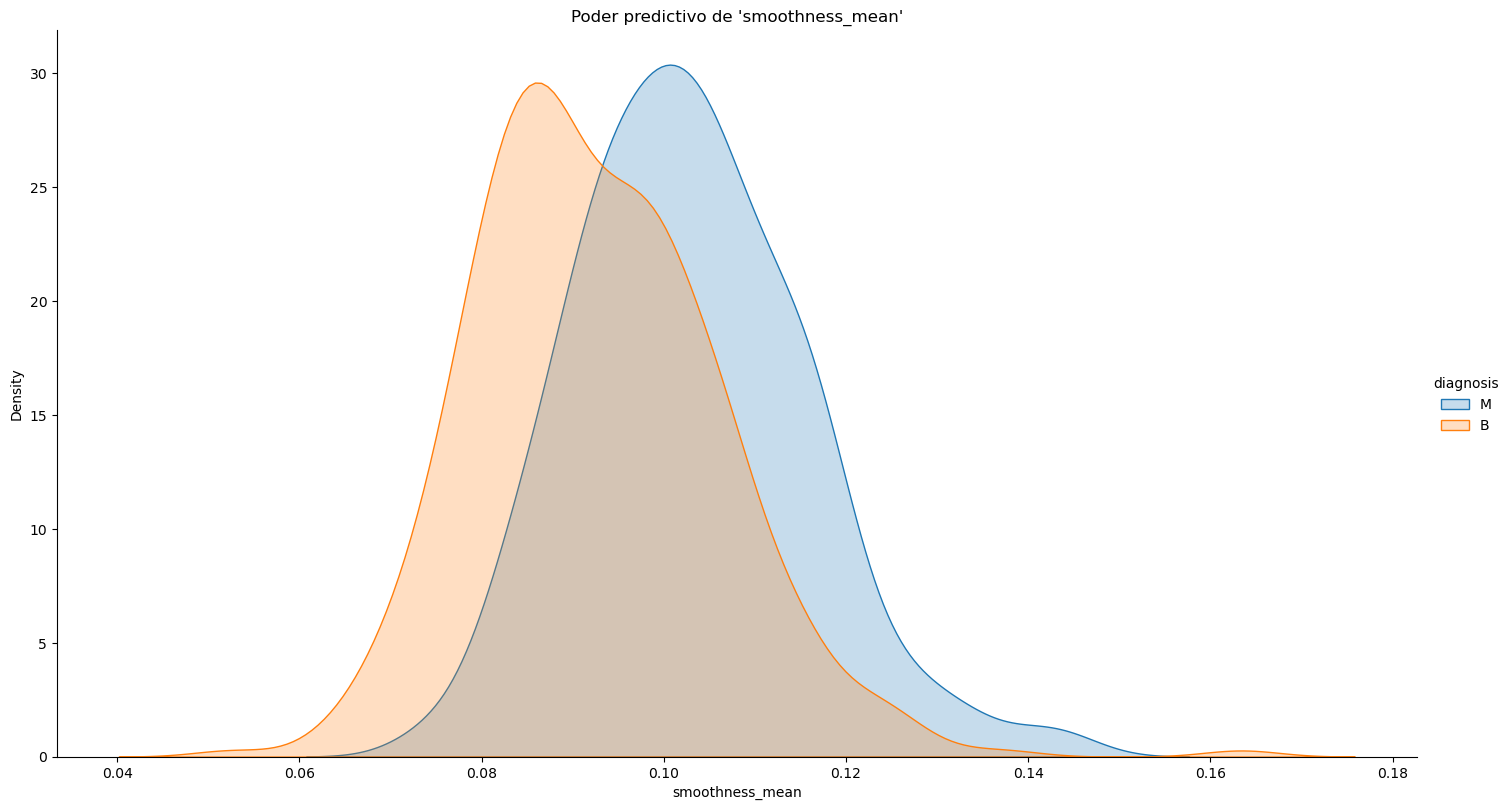

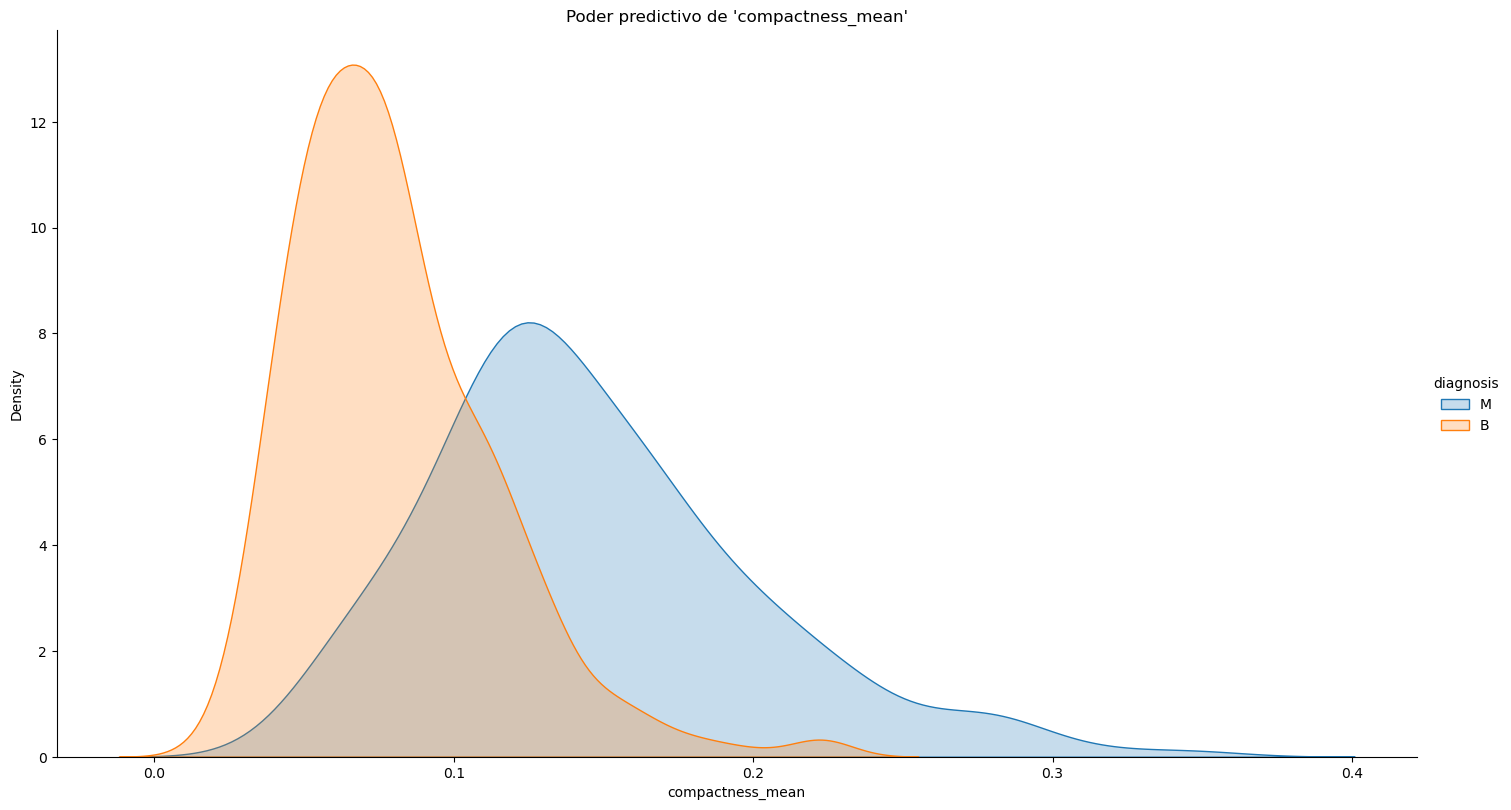

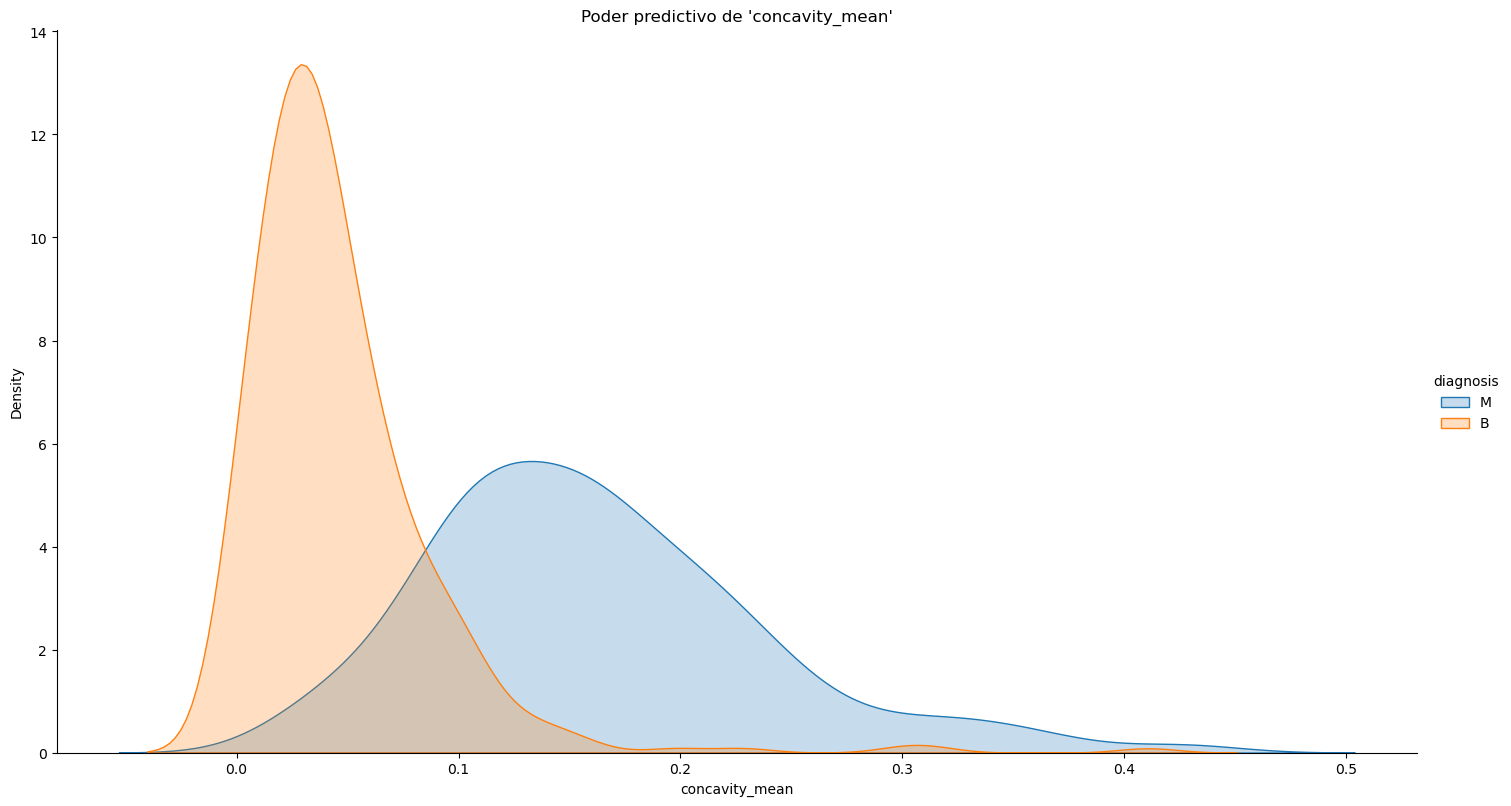

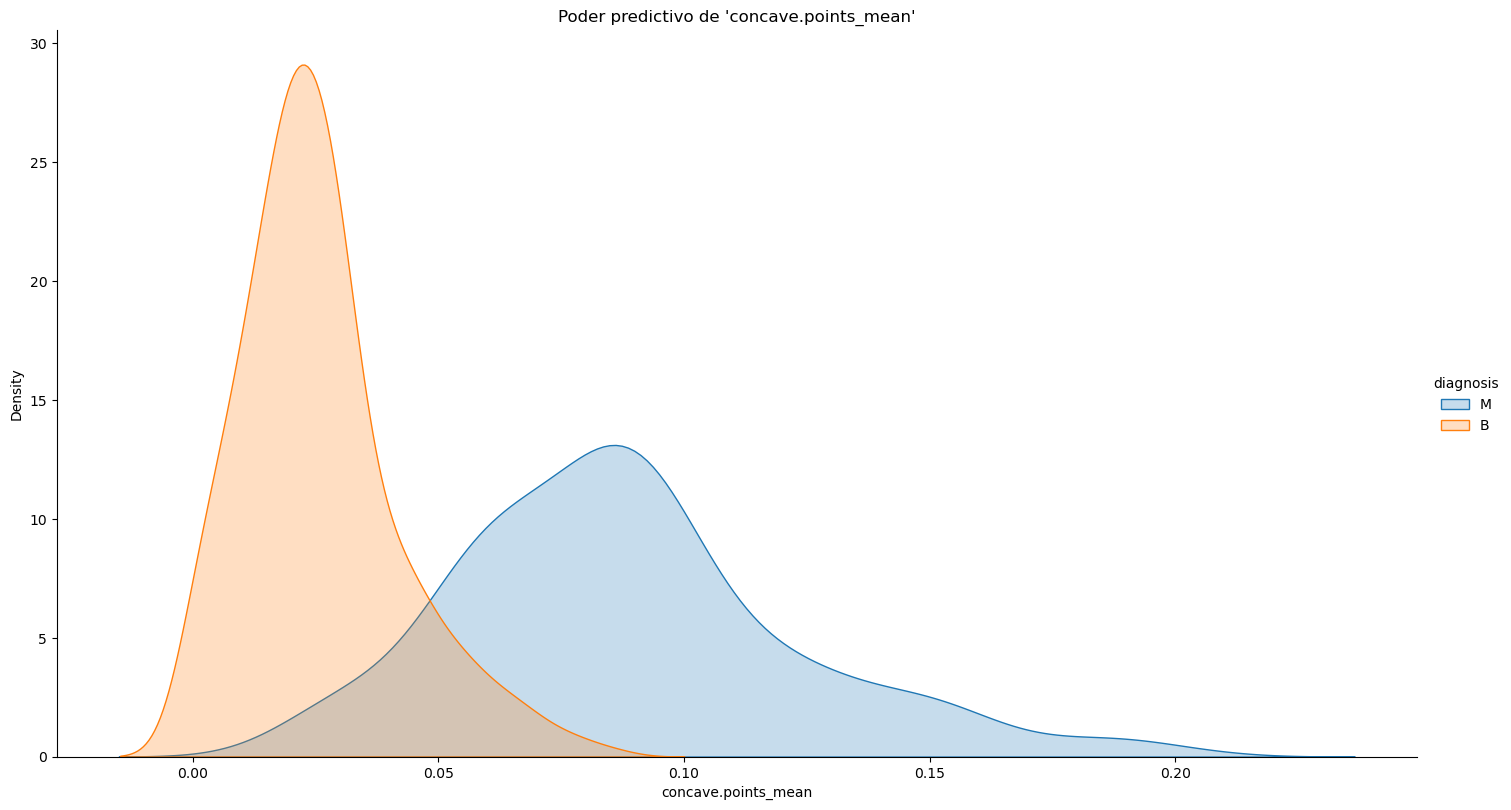

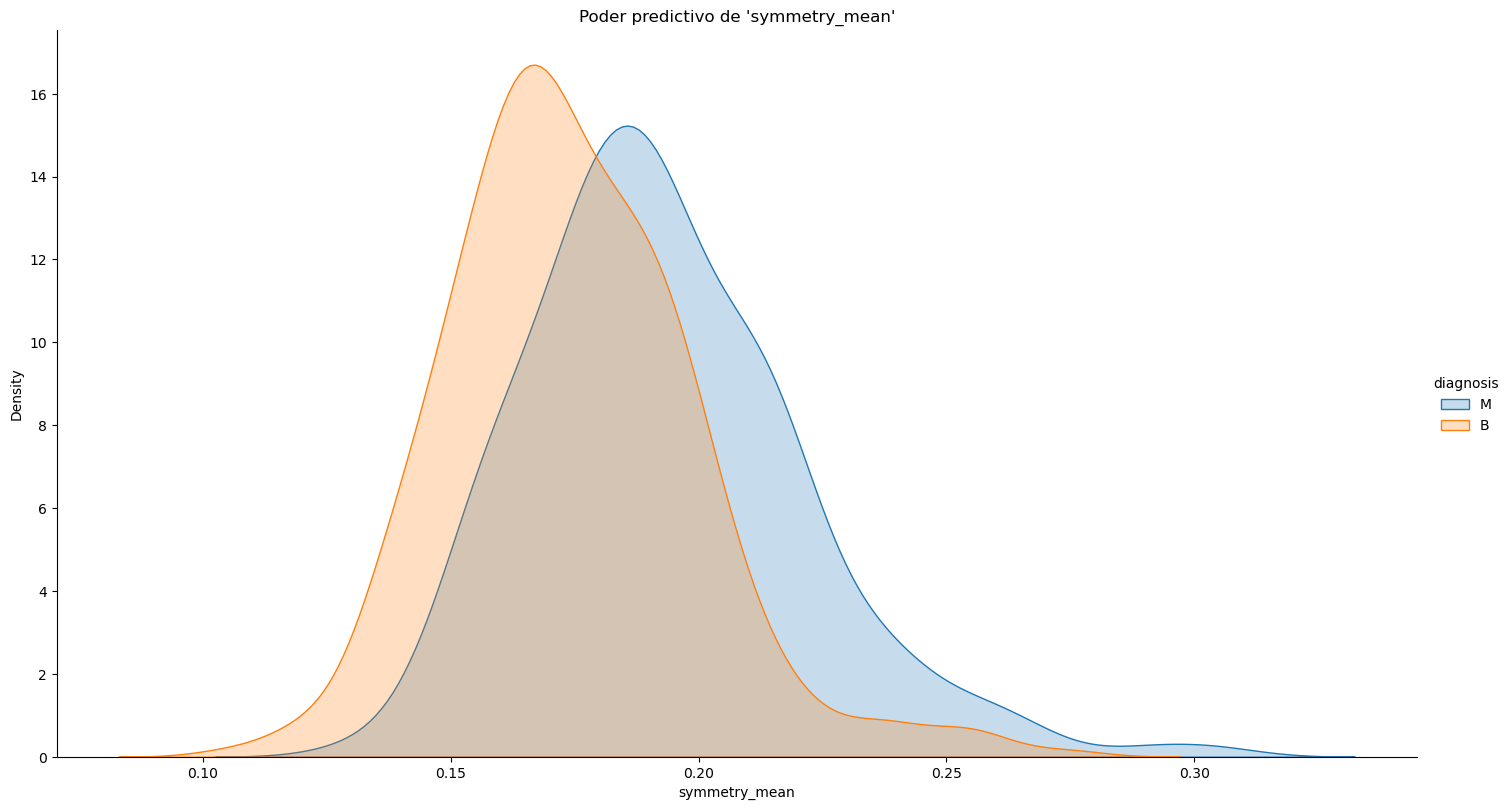

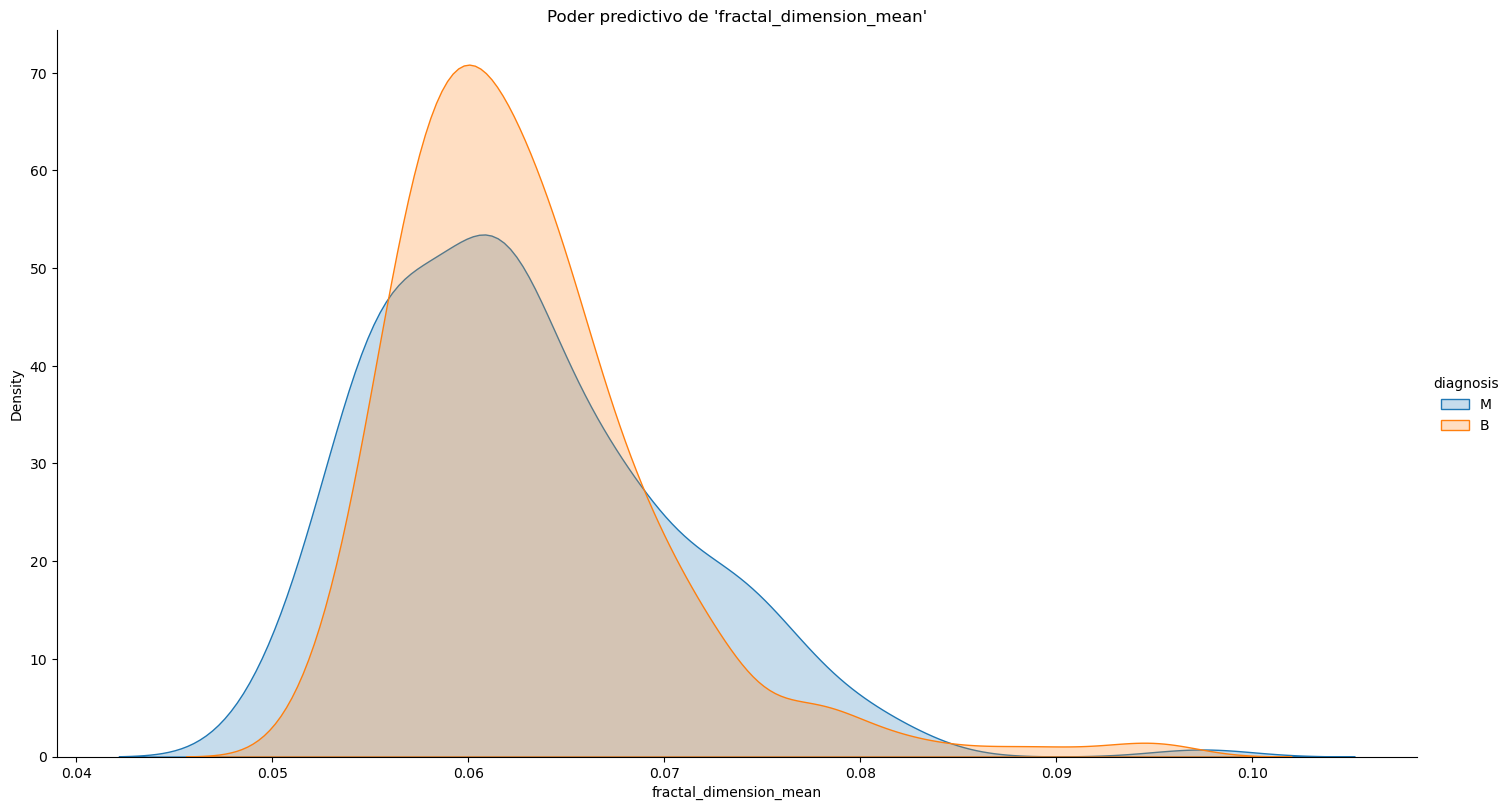

In [172]:
# Lista de variables a graficar
variables = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean",
             "concavity_mean", "concave.points_mean", "symmetry_mean", "fractal_dimension_mean"]

# Iterar sobre cada variable y generar el gráfico
for variable in variables:
    analisis_sigmoid.poder_predictivo_numerica(variable)
    plt.title(f"Poder predictivo de '{variable}'")
    plt.show()

Las variables radious mean, concavity mean, compactness mean, texture mean y concave points mean son las cinco variables que tienen el mayor poder predictivo dado que la interseccion entre las curvas de densidad es menor que con las otras variables.

d) Construya un DataFrame que compare el mejor modelo generado arriba contra los mejores modelos construidos en tareas anteriores para la tabla breast_cancer.csv. Para esto, en cada una de las filas debe aparecer un modelo predictivo, y en las columnas deben aparecer los índices Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos?

In [173]:
# Variables para almacenar las métricas de cada núcleo
metrics_linear = {}
metrics_poly = {}
metrics_rbf = {}
metrics_sigmoid = {}

# Iterar sobre cada núcleo
for nucleo in nucleos:
    matriz_confusion = resultados_modelos[nucleo]['Matriz de Confusión']
    print(f"Métricas SVM {nucleo}:")
    # Extraer los valores de la matriz de confusión
    TP = matriz_confusion[0][0]
    FP = matriz_confusion[0][1]
    FN = matriz_confusion[1][0]
    TN = matriz_confusion[1][1]
    # Crear un vector de 1x4 con los valores extraídos
    MC_nucleo = [TP, FP, FN, TN]
    # Métricas
    calculator_nucleo = MetricsCalculator(MC_nucleo)
    metrics_nucleo = calculator_nucleo.calculate_metrics()
    # Asignar las métricas a la variable correspondiente
    if nucleo == "linear":
        metrics_linear = metrics_nucleo
    elif nucleo == "poly":
        metrics_poly = metrics_nucleo
    elif nucleo == "rbf":
        metrics_rbf = metrics_nucleo
    elif nucleo == "sigmoid":
        metrics_sigmoid = metrics_nucleo
    # Imprimir métricas
    for metric, value in metrics_nucleo.items():
        print(f"{metric}: {value}")


Métricas SVM linear:
Precisión Global: 0.9298245614035088
Error Global: 0.07017543859649122
Precisión Positiva: 0.9473684210526315
Precisión Negativa: 0.9210526315789473
Métricas SVM poly:
Precisión Global: 0.8859649122807017
Error Global: 0.11403508771929827
Precisión Positiva: 0.7333333333333333
Precisión Negativa: 0.9855072463768116
Métricas SVM rbf:
Precisión Global: 0.9210526315789473
Error Global: 0.07894736842105265
Precisión Positiva: 0.8333333333333334
Precisión Negativa: 0.9848484848484849
Métricas SVM sigmoid:
Precisión Global: 0.8947368421052632
Error Global: 0.10526315789473684
Precisión Positiva: 0.8888888888888888
Precisión Negativa: 0.8985507246376812


In [174]:
# Creamos los nuevos datos asociados a los nuevos modelos
data = {
    'Modelo Predictivo': ['SVM linear', 'SVM poly', 'SVM rbf', 'SVM sigmoid'],
    'Precisión Global': [metrics_linear['Precisión Global'], metrics_poly['Precisión Global'], metrics_rbf['Precisión Global'], metrics_sigmoid['Precisión Global']],
    'Error Global': [metrics_linear['Error Global'], metrics_poly['Error Global'], metrics_rbf['Error Global'], metrics_sigmoid['Error Global']],
    'Precisión Positiva': [metrics_linear['Precisión Positiva'], metrics_poly['Precisión Positiva'], metrics_rbf['Precisión Positiva'],  metrics_sigmoid['Precisión Positiva']],
    'Precisión Negativa': [metrics_linear['Precisión Negativa'], metrics_poly['Precisión Negativa'], metrics_rbf['Precisión Negativa'], metrics_sigmoid['Precisión Negativa']]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [175]:
df

,Modelo Predictivo,Precisión Global,Error Global,Precisión Positiva,Precisión Negativa
0,SVM linear,0.929825,0.070175,0.947368,0.921053
1,SVM poly,0.885965,0.114035,0.733333,0.985507
2,SVM rbf,0.921053,0.078947,0.833333,0.984848
3,SVM sigmoid,0.894737,0.105263,0.888889,0.898551


In [177]:
# Cargar el DataFrame de los resultados de la tarea anterior
datos_anteriores = pd.read_csv('resultados_cancer.csv')

# Concatenar ambos DataFrames a lo largo de las columnas
datos_completos_cancer = pd.concat([datos_anteriores, df], axis=0)

# Imprimir el DataFrame completo
print(datos_completos_cancer.to_string(index=False))

Modelo Predictivo  Precisión Global  Error Global  Precisión Positiva  Precisión Negativa
              KNN          0.859649      0.140351            0.794872            0.893333
Árbol de Decisión          0.894737      0.105263            0.871795            0.906667
    Random Forest          0.918129      0.081871            0.800000            0.990566
     Ada Boosting          0.947368      0.052632            0.900000            0.972973
       XGBoosting          0.938596      0.061404            0.897959            0.969231
       SVM linear          0.929825      0.070175            0.947368            0.921053
         SVM poly          0.885965      0.114035            0.733333            0.985507
          SVM rbf          0.921053      0.078947            0.833333            0.984848
      SVM sigmoid          0.894737      0.105263            0.888889            0.898551


El mejor modelo para los datos de breast cancer es Ada boosting ya que tiene una precision global de casi 95%, la precision por categoria es superior al 90%.

# Ejercicio 2

En este ejercicio vamos a trabajar con los datos del archivo 'hotel_bookings_completos.csv'. El conjunto de datos consta de 20,379 filas y 19 columnas

In [136]:
#lectura de datos
datos = pd.read_csv('C:/Users/uriar/OneDrive/Fátima Uriarte/Fati Files/PROMIDAD Generacion ETA/Python/3. Metodos Supervisados Python/Clase 4/Tarea4/hotel_bookings_completo.csv',delimiter = ',',decimal = ".")
print("Hotel bookings completo: ", datos.shape, "\n")

Hotel bookings completo:  (20379, 19) 



In [137]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20379 non-null  object 
 1   is_canceled                     20379 non-null  object 
 2   lead_time                       20379 non-null  int64  
 3   arrival_date_month              20379 non-null  object 
 4   stays_in_weekend_nights         20379 non-null  int64  
 5   stays_in_week_nights            20379 non-null  int64  
 6   adults                          20379 non-null  int64  
 7   children                        20379 non-null  int64  
 8   babies                          20379 non-null  int64  
 9   previous_cancellations          20379 non-null  int64  
 10  previous_bookings_not_canceled  20379 non-null  int64  
 11  assigned_room_type              20379 non-null  object 
 12  booking_changes                 

In [138]:
# Convierte las variables a categórica
for col in ['hotel', 'arrival_date_month', 'assigned_room_type', 'deposit_type', 'customer_type']:
    datos[col] = datos[col].astype('category')
    datos[col] = datos[col].cat.codes
    datos[col] = datos[col].astype('category')
datos.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,Yes,74,3,1,0,2,0,0,0,0,0,0,0,0,2,57.60,0,0
1,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
2,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
3,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
4,1,Yes,71,3,2,2,1,0,0,0,0,0,0,0,0,2,32.22,0,1


In [139]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           20379 non-null  category
 1   is_canceled                     20379 non-null  object  
 2   lead_time                       20379 non-null  int64   
 3   arrival_date_month              20379 non-null  category
 4   stays_in_weekend_nights         20379 non-null  int64   
 5   stays_in_week_nights            20379 non-null  int64   
 6   adults                          20379 non-null  int64   
 7   children                        20379 non-null  int64   
 8   babies                          20379 non-null  int64   
 9   previous_cancellations          20379 non-null  int64   
 10  previous_bookings_not_canceled  20379 non-null  int64   
 11  assigned_room_type              20379 non-null  category
 12  booking_changes   

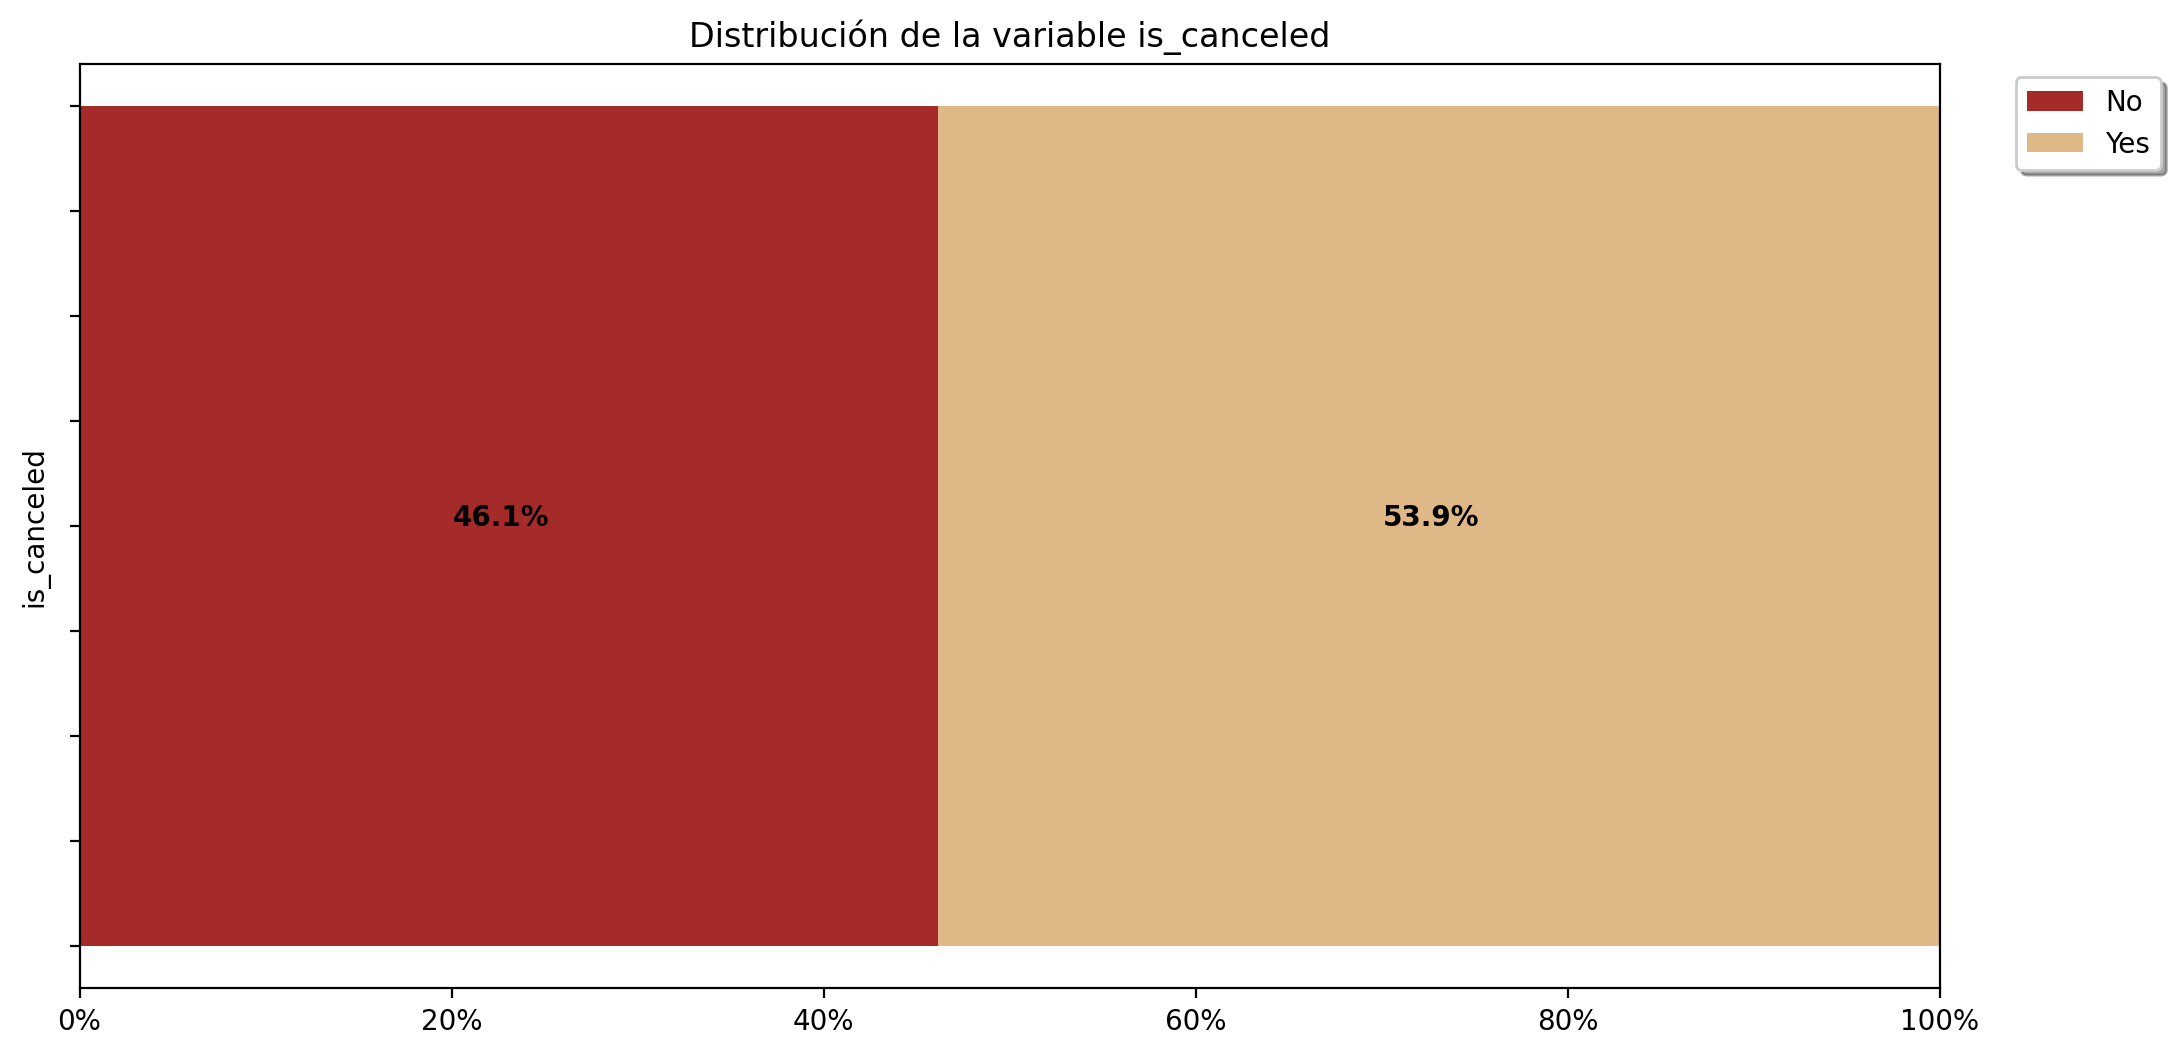

In [140]:
#Balance de las clases en la variable a predecir - Problema balanceado
analisis_Credito = Analisis_Predictivo(datos, predecir="is_canceled")
analisis_Credito.distribucion_variable_predecir()
plt.show()

a) Utilice Máquinas de Soporte Vectorial en Python (con los parámetros por defecto) para generar un modelo predictivo para la tabla 'hotel_bookings_completos.csv' utilizando el 70 % de los datos para el conjunto de entrenamiento y el 30 % para el conjunto de prueba. Luego, calcule la matriz de confusión, la precisión global y la precisión para cada una de las dos categorías utilizando los datos de prueba. ¿Son buenos los resultados? Explique.

In [108]:
# Tenemos disponibles los núcleos linear, poly, rbf, sigmoid, precomputed. Por defecto se utiliza rbf
instancia_svm = SVC(kernel="rbf")

analisis_booking = Analisis_Predictivo(datos, predecir = "is_canceled", modelo = instancia_svm, train_size = 0.7)

In [109]:
resultados = analisis_booking.fit_predict_resultados()


Matriz de Confusión:
[[2542  284]
 [ 655 2633]]

Precisión Global:
0.8464180569185475

Error Global:
0.15358194308145245

Precisión por categoría:
         No       Yes
0  0.899505  0.800791


Los resultados son relativamente buenos, ya que se alcanza una precision global de 85% y una precision por categoria superior al 80%

b) Repita el ítem anterior, pero intente identificar el mejor núcleo (kernel) y valor para el parámetro de regularización C. ¿Mejora la predicción?

In [110]:
nucleos = ["linear", "poly", "rbf", "sigmoid"]
resultados_modelos = {}

for nucleo in nucleos:
    nombre_analisis = f"analisis_{nucleo}"  # Nombre del análisis usando el nombre del núcleo
    instancia_svm = SVC(kernel=nucleo)
    # Definir analisis_cancer con un nombre diferente según el núcleo utilizado
    exec(f"{nombre_analisis} = Analisis_Predictivo(datos, predecir='is_canceled', modelo=instancia_svm, train_size=0.7)")
    print("\033[1m" + nombre_analisis + "\033[0m")  # Imprimir en negrita
    resultados = eval(nombre_analisis).fit_predict_resultados()
    resultados_modelos[nucleo] = resultados

analisis_linear

Matriz de Confusión:
[[2662  165]
 [ 978 2309]]

Precisión Global:
0.8130520117762512

Error Global:
0.1869479882237488

Precisión por categoría:
         No       Yes
0  0.941634  0.702464
analisis_poly

Matriz de Confusión:
[[2490  260]
 [ 659 2705]]

Precisión Global:
0.8496892378148512

Error Global:
0.15031076218514883

Precisión por categoría:
         No       Yes
0  0.905455  0.804102
analisis_rbf

Matriz de Confusión:
[[2558  283]
 [ 632 2641]]

Precisión Global:
0.8503434739941119

Error Global:
0.14965652600588808

Precisión por categoría:
         No       Yes
0  0.900387  0.806905
analisis_sigmoid

Matriz de Confusión:
[[1991  813]
 [ 891 2419]]

Precisión Global:
0.7212953876349362

Error Global:
0.27870461236506383

Precisión por categoría:
         No       Yes
0  0.710057  0.730816


No mejora la prediccion usando otros nucleos del modelo de svm.

c) Construya un DataFrame que compare el mejor modelo generado anteriormente contra los mejores modelos construidos en tareas anteriores para la tabla 'hotel_bookings_completos.csv'. En cada fila debe aparecer un modelo predictivo, y en las columnas deben aparecer los índices de Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos?